# UWB Dataset Preprocessing

This Python Notebook outlines the operations performed on the *UWN-LOS-NLOS-Dataset* dataset, which consists of 42000 Channel Impulse Response (CIR) samples taken within seven different indoor environments, captured using Decaware’s DWM1000 UWB transceivers. These CIR samples measure the signal propagation between anchors and tags deployed in these environments.
The goal of the pre-processing step is to experiment with multiple pre-processing strategies to create multiple datasets that can be fed to the different machine learning models such that comparisons can be made. This would allow the team to identify the best processed dataset to be used to train machine learning models efficiently as well as creating the best performing model to classify Ultra-Wideband (UWB) wireless signals.

<ins>Preprocessing Operations</ins>
1. [Dataset Creation](#dataset-creation)
2. [Preliminary Exploratory Data Analysis](#preliminary-exploratory-data-analysis)
3. [Feature Engineering](#feature-engineering)

In [1]:
""" Imports """
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from utils import *

# Load the datasets
dict_datasets = {
    'uwb_dataset_part1': pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part1.csv'),
    'uwb_dataset_part2': pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part2.csv'),
    'uwb_dataset_part3': pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part3.csv'),
    'uwb_dataset_part4': pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part4.csv'),
    'uwb_dataset_part5': pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part5.csv'),
    'uwb_dataset_part6': pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part6.csv'),
    'uwb_dataset_part7': pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part7.csv')
}

In [2]:
# View LOS/NLOS Distribution for each dataset
for k, v in dict_datasets.items():
    print(f'{k}\n', v['NLOS'].value_counts(normalize=True) * 100, end='\n\n')

uwb_dataset_part1
 NLOS
0.0    50.533333
1.0    49.466667
Name: proportion, dtype: float64

uwb_dataset_part2
 NLOS
0.0    50.3
1.0    49.7
Name: proportion, dtype: float64

uwb_dataset_part3
 NLOS
0.0    50.133333
1.0    49.866667
Name: proportion, dtype: float64

uwb_dataset_part4
 NLOS
1.0    50.916667
0.0    49.083333
Name: proportion, dtype: float64

uwb_dataset_part5
 NLOS
0.0    50.55
1.0    49.45
Name: proportion, dtype: float64

uwb_dataset_part6
 NLOS
0.0    50.233333
1.0    49.766667
Name: proportion, dtype: float64

uwb_dataset_part7
 NLOS
1.0    50.833333
0.0    49.166667
Name: proportion, dtype: float64



We can observe that all seven datasets have unequal NLOS/LOS class distributions, due to dataset size differences, even though the differences are minor.

## Dataset Creation
Stratified sampling is performed on each UWB dataset to ensure generalisation of dataset classes, as each dataset has a different distribution of LOS / NLOS classes. Performing this has now ensured that the combined dataset is evenly balanced for subsequent processing operations.

In [3]:
# Initialise train-test lists
full_training = []
full_testing = []

# Create stratified train-test datasets, with stratified sampling based on 'NLOS' column iterate through EACH df INDIVIDUALLY! (70/30 split)
for k, v in dict_datasets.items():
    train, test = train_test_split(v, test_size=TEST_SIZE, stratify=v['NLOS'], random_state=RANDOM_STATE)
    full_training.append(train)
    full_testing.append(test)

# Concatenate the training and testing DataFrames
df_training = pd.concat(full_training)
df_testing = pd.concat(full_testing)

# Combine everything back together
df_original = pd.concat([df_training, df_testing])

# Display the combined DataFrame
df_original.reset_index(drop=True, inplace=True)

# Export dataset
save_to_pickle("original_dataset", df_original)
df_original

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
0,1.0,5.43,741.0,3561.0,5533.0,4948.0,88.0,1788.0,1289.0,1024.0,...,249.0,304.0,211.0,67.0,104.0,297.0,351.0,101.0,204.0,0.0
1,1.0,6.04,743.0,8685.0,5344.0,8535.0,176.0,6103.0,2713.0,1024.0,...,463.0,958.0,333.0,160.0,498.0,529.0,359.0,1005.0,448.0,512.0
2,1.0,2.72,746.0,6445.0,19438.0,16356.0,32.0,7925.0,741.0,329.0,...,190.0,89.0,150.0,108.0,268.0,99.0,9.0,231.0,240.0,0.0
3,1.0,9.33,745.0,7616.0,4470.0,2439.0,76.0,9447.0,1152.0,1024.0,...,302.0,242.0,468.0,549.0,222.0,192.0,128.0,112.0,260.0,0.0
4,1.0,1.36,750.0,9729.0,16896.0,12385.0,64.0,6993.0,1548.0,280.0,...,143.0,349.0,222.0,117.0,123.0,172.0,174.0,115.0,189.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,6.43,747.0,11328.0,16771.0,10854.0,72.0,9340.0,1082.0,952.0,...,221.0,499.0,349.0,193.0,100.0,384.0,249.0,306.0,124.0,0.0
41996,0.0,1.76,744.0,12940.0,15009.0,15644.0,48.0,10151.0,1097.0,289.0,...,207.0,130.0,261.0,252.0,206.0,246.0,225.0,233.0,244.0,256.0
41997,0.0,1.45,748.0,10061.0,18742.0,14321.0,56.0,10173.0,1509.0,276.0,...,261.0,55.0,255.0,316.0,205.0,241.0,196.0,318.0,265.0,0.0
41998,0.0,4.87,746.0,1751.0,12755.0,16031.0,52.0,11843.0,830.0,453.0,...,150.0,145.0,115.0,211.0,194.0,210.0,260.0,110.0,166.0,0.0


## Preliminary Exploratory Data Analysis

### Preliminary Feature Analysis

In [4]:
# Get all features
print("Total Features:", len(df_original.columns), end='\n')

print("Non-CIR Features:", len(df_original.columns[:15]))
print(df_original.columns[:15], end='\n\n')

print("CIR Features:", len(df_original.columns[15:]))
print(df_original.columns[15:])

Total Features: 1031
Non-CIR Features: 15
Index(['NLOS', 'RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3',
       'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC', 'CH', 'FRAME_LEN',
       'PREAM_LEN', 'BITRATE', 'PRFR'],
      dtype='object')

CIR Features: 1016
Index(['CIR0', 'CIR1', 'CIR2', 'CIR3', 'CIR4', 'CIR5', 'CIR6', 'CIR7', 'CIR8',
       'CIR9',
       ...
       'CIR1006', 'CIR1007', 'CIR1008', 'CIR1009', 'CIR1010', 'CIR1011',
       'CIR1012', 'CIR1013', 'CIR1014', 'CIR1015'],
      dtype='object', length=1016)


With reference to the original UWB dataset authors' descriptions [[1]](#references), we can categorise the dataset features into **CIR (Channel Impulse Response)** and **Non-CIR**. 

A brief overview of all initial features is detailed below:

<ins>CIR Features</ins>
- `CIR0` to `CIR1015` (1016 samples with 1 nano-second resolution)

<ins>Non-CIR Features</ins>
- Class Feature
    - `NLOS` 
        - Indicates LOS/NLOS Class (0: LOS, 1: NLOS)
- Frame Quality Indicators (used to assess the quality of messages received, and any related timestamps [[2]](#references))
    - `RANGE`
        - Measured range (time of flight)
    - `FP_IDX` (First Power Index)
        - Index of detected first path element in CIR accumulator (**16-bit value** reporting the position within the accumulator that the Leading Edge (LDE) algorithm has determined to be the first path)
    - `FP_AMP1`
        - The amplitude of the sample reported is the magnitude of the accumulator tap at the **index 1** beyond the integer portion of the rising edge `FP_IDX`.
    - `FP_AMP2`
        - The amplitude of the sample reported is the magnitude of the accumulator tap at the **index 2** beyond the integer portion of the rising edge `FP_IDX`.
    - `FP_AMP3`
        - The amplitude of the sample reported is the magnitude of the accumulator tap at the **index 3** beyond the integer portion of the rising edge `FP_IDX`.
    - `STDEV_NOISE` ($\sigma\ CIREN)$
        - Standard Deviation of CIR Estimate Noise (**16-bit value** reporting the standard deviation of the noise level seen during the LDE algorithm’s analysis of the accumulator data)
    - `CIR_PWR`
        - Total Channel Impulse Response Power (**16-bit value** reporting the sum of the squares of the magnitudes of the accumulator from the estimated highest power portion of the channel, which is related to the receive signal power)
    - `MAX_NOISE`
        - Maximum value of noise detected
    - `RXPACC`
        - Received RX preamble symbols (Preamble Accumulation Count)
    - `CH`
        - Channel value
    - `FRAME_LEN`
        - Length of frame
    - `PREAM_LEN`
        - Length of preamble
    - `BITRATE`
        - Message's bit rate
    - `PRFR`
        - Pulse Repetition Frequency Rate (Mhz)

#### Preview Data

In [5]:
print("Dataset Features (excluding 1000+ CIR columns)")
df_original[['NLOS', 'RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC', 'CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR']]

Dataset Features (excluding 1000+ CIR columns)


,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR
0,1.0,5.43,741.0,3561.0,5533.0,4948.0,88.0,1788.0,1289.0,1024.0,2.0,27.0,1024.0,110.0,64.0
1,1.0,6.04,743.0,8685.0,5344.0,8535.0,176.0,6103.0,2713.0,1024.0,2.0,39.0,1024.0,110.0,64.0
2,1.0,2.72,746.0,6445.0,19438.0,16356.0,32.0,7925.0,741.0,329.0,2.0,39.0,1024.0,110.0,64.0
3,1.0,9.33,745.0,7616.0,4470.0,2439.0,76.0,9447.0,1152.0,1024.0,2.0,39.0,1024.0,110.0,64.0
4,1.0,1.36,750.0,9729.0,16896.0,12385.0,64.0,6993.0,1548.0,280.0,2.0,39.0,1024.0,110.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,6.43,747.0,11328.0,16771.0,10854.0,72.0,9340.0,1082.0,952.0,2.0,27.0,1024.0,110.0,64.0
41996,0.0,1.76,744.0,12940.0,15009.0,15644.0,48.0,10151.0,1097.0,289.0,2.0,39.0,1024.0,110.0,64.0
41997,0.0,1.45,748.0,10061.0,18742.0,14321.0,56.0,10173.0,1509.0,276.0,2.0,39.0,1024.0,110.0,64.0
41998,0.0,4.87,746.0,1751.0,12755.0,16031.0,52.0,11843.0,830.0,453.0,2.0,39.0,1024.0,110.0,64.0


In [6]:
print("Dataset Features (CIR columns)")
df_original.iloc[:, 15:]

Dataset Features (CIR columns)


,CIR0,CIR1,CIR2,CIR3,CIR4,CIR5,CIR6,CIR7,CIR8,CIR9,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
0,299.0,225.0,200.0,378.0,62.0,114.0,230.0,177.0,238.0,448.0,...,249.0,304.0,211.0,67.0,104.0,297.0,351.0,101.0,204.0,0.0
1,550.0,313.0,737.0,416.0,643.0,528.0,537.0,994.0,708.0,94.0,...,463.0,958.0,333.0,160.0,498.0,529.0,359.0,1005.0,448.0,512.0
2,140.0,300.0,280.0,331.0,237.0,167.0,96.0,99.0,39.0,127.0,...,190.0,89.0,150.0,108.0,268.0,99.0,9.0,231.0,240.0,0.0
3,467.0,265.0,410.0,376.0,233.0,214.0,470.0,359.0,342.0,172.0,...,302.0,242.0,468.0,549.0,222.0,192.0,128.0,112.0,260.0,0.0
4,221.0,131.0,220.0,218.0,231.0,73.0,148.0,315.0,266.0,160.0,...,143.0,349.0,222.0,117.0,123.0,172.0,174.0,115.0,189.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,80.0,141.0,196.0,93.0,122.0,198.0,342.0,501.0,452.0,96.0,...,221.0,499.0,349.0,193.0,100.0,384.0,249.0,306.0,124.0,0.0
41996,173.0,136.0,251.0,260.0,245.0,88.0,93.0,244.0,249.0,301.0,...,207.0,130.0,261.0,252.0,206.0,246.0,225.0,233.0,244.0,256.0
41997,192.0,285.0,243.0,211.0,222.0,67.0,311.0,205.0,293.0,269.0,...,261.0,55.0,255.0,316.0,205.0,241.0,196.0,318.0,265.0,0.0
41998,182.0,162.0,95.0,268.0,196.0,134.0,88.0,63.0,236.0,127.0,...,150.0,145.0,115.0,211.0,194.0,210.0,260.0,110.0,166.0,0.0


#### Check for any missing or null values

In [7]:
# Check for missing values in each column across the whole dataset, if there are any missing values, return True
missing_values = df_original.isnull().isna().any().any()
missing_values

False

Upon analysis, there does not seem to be any missing values in the dataset.

#### Check for any duplicated data

In [8]:
# Check for duplicated rows
df_original[df_original.duplicated()].shape[0]

0

Upon analysis, there does not seem to be any duplicated rows in the dataset.

#### Find features with single-values only 

In [9]:
list_single_value_features = []
for column in df_original.columns:
    if(len(df_original[column].value_counts()) == 1):
        list_single_value_features.append(column)
list_single_value_features

['CH', 'BITRATE', 'PRFR']

In [10]:
for column in list_single_value_features:
    print(df_original[column].value_counts(), end="\n\n")

CH
2.0    42000
Name: count, dtype: int64

BITRATE
110.0    42000
Name: count, dtype: int64

PRFR
64.0    42000
Name: count, dtype: int64



We observe that three features have single-values. Since these features only have one value, they will be dropped later on.
- `CH` (Channel Number, consists of single value 2.0)
- `BITRATE` (Bitrate, consists of single value 110.0)
- `PRFR` (Pulse Repetition Frequency, consists of single value 64.0)
    - Will be used to indicate the value of constant $A$ in calculations for derived values `RX_POWER` and `FP_POWER` later on.

In [11]:
# Create a copy of the original dataframe before moving on
df_original_copy = df_original.copy()

## Feature Engineering
Based on the domain knowledge derived from [[3]](#references), we will perform the following operations sequentially:
1. [Outlier Management](#outlier-management)
    - Identify and handle outliers.
2. [Feature Creation](#feature-creation)
    - [Non-CIR Features](#feature-creation-non-cir)
        - Create `FP_POWER`, `RX_POWER`, `D_POWER`, `D_POWER_LOS`, `D_POWER_NLOS` features.
    - [CIR Features](#feature-creation-cir)
        - Create `CIR_MEAN`
3. [Feature Reduction](#feature-reduction)
    - Perform Principal Component Analysis on `CIR` features
4. [Feature Analysis](#feature-analysis)
    - Analysis of feature importance with regards to LOS/NLOS classification.
5. [Feature Selection](#feature-selection)
    - Feature Subset Selection/Elimination.
6. [Dataset Subsetting](#dataset-subsetting)
    - Create data-subsets from the original dataset.

### Outlier Management
- Focus on non-CIR data
- Focus on CIR data

In [12]:
# Get values that only occur once (potential outliers)
print("Values that only appear once in each feature (potential outliers)\n")

# Ignore these features (class and derived features which will have inherent single values due to computations)
list_ignore = ['NLOS', 'FP_POWER', 'RX_POWER', 'D_POWER'] + list(df_original_copy.columns[15:])

for column in df_original_copy.columns:
    if(column not in list_ignore):
        list_single_occurrence_values = df_original_copy[column].value_counts()[df_original_copy[column].value_counts() == 1].index.tolist()
        total_values = len(list_single_occurrence_values)
        if(total_values > 0):
            print(f"{column} ({total_values}):\n{list_single_occurrence_values}", end='\n\n')

Values that only appear once in each feature (potential outliers)

RANGE (72):
[11.94, 12.42, 11.55, 11.33, 11.09, 12.05, 11.03, 11.23, 13.1, 11.21, 11.86, 10.64, 12.2, 11.89, 11.12, 12.62, 10.8, 11.05, 11.74, 10.56, 10.71, 11.77, 11.88, 12.25, 12.49, 13.06, 11.08, 12.23, 11.75, 12.46, 11.22, 11.01, 9.93, 10.41, 10.57, 11.34, 11.95, 11.72, 10.37, 11.44, 12.24, 10.6, 12.47, 15.43, 11.49, 0.04, 13.58, 10.69, 13.04, 13.5, 10.79, 13.0, 11.87, 12.57, 10.86, 0.0, 12.77, 10.88, 10.81, 28.02, 11.61, 13.13, 11.26, 10.89, 11.7, 11.17, 12.91, 11.11, 13.48, 11.02, 11.82, 11.81]

FP_IDX (28):
[831.0, 820.0, 823.0, 759.0, 777.0, 803.0, 772.0, 766.0, 830.0, 708.0, 789.0, 811.0, 757.0, 758.0, 847.0, 835.0, 846.0, 804.0, 792.0, 816.0, 712.0, 808.0, 833.0, 806.0, 755.0, 810.0, 838.0, 819.0]

FP_AMP1 (5125):
[10975.0, 13465.0, 18221.0, 6534.0, 1126.0, 6137.0, 4587.0, 6507.0, 15399.0, 16652.0, 10996.0, 18756.0, 13504.0, 5544.0, 15369.0, 10006.0, 404.0, 16857.0, 17288.0, 17840.0, 8822.0, 16468.0, 14167.0, 

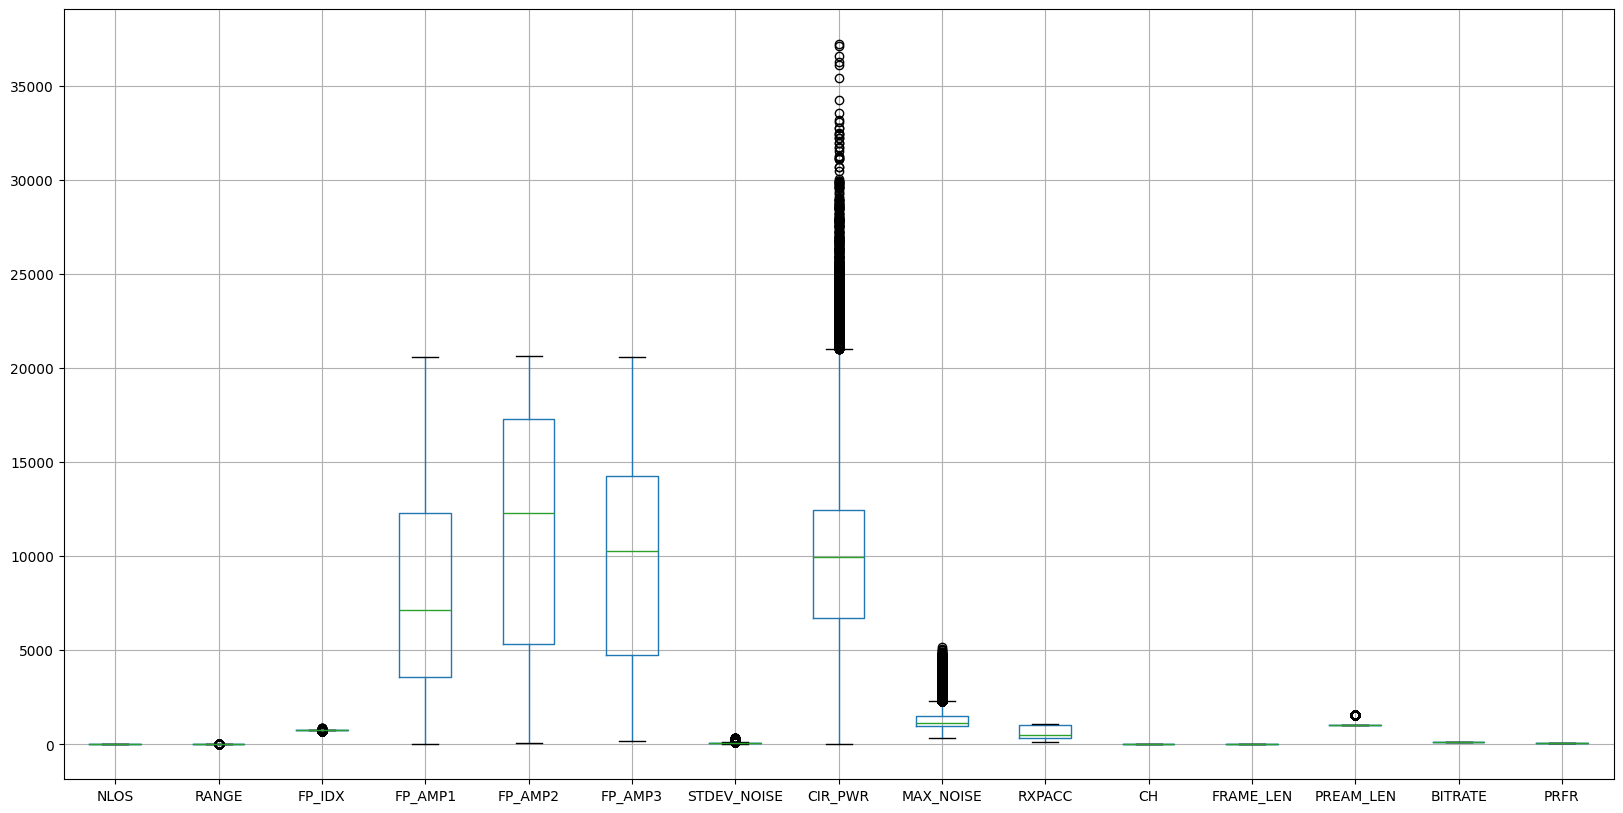

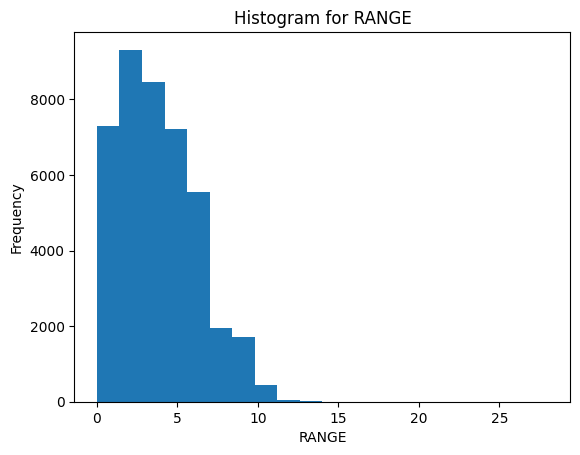

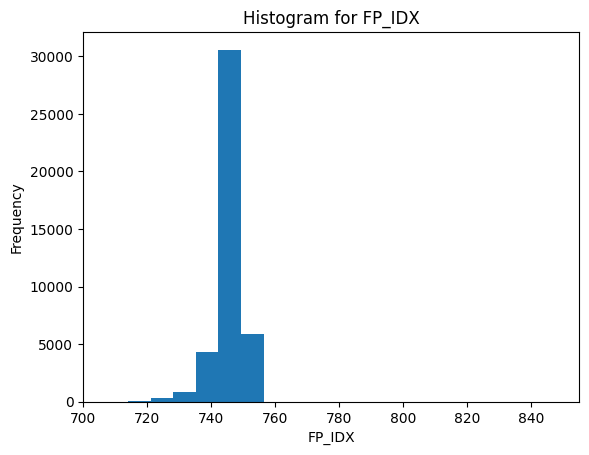

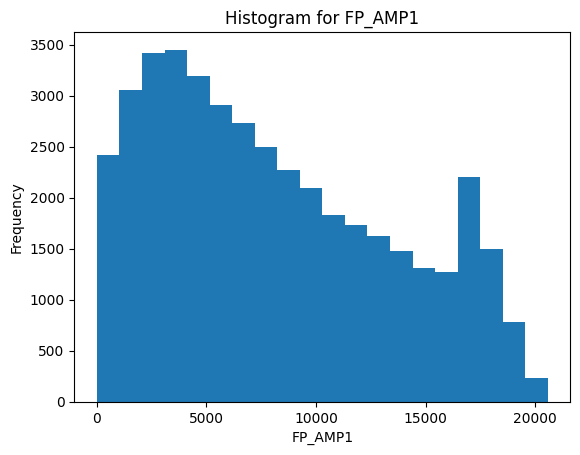

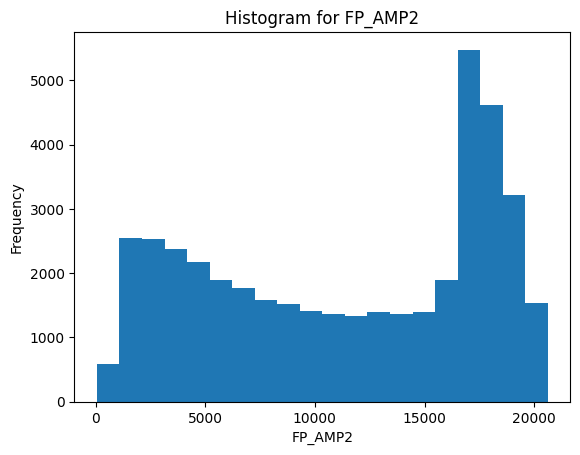

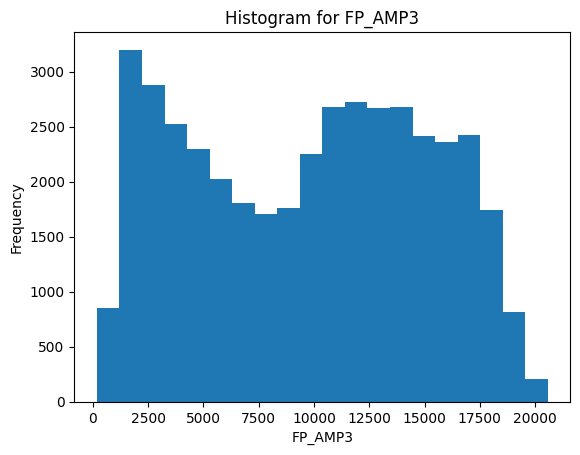

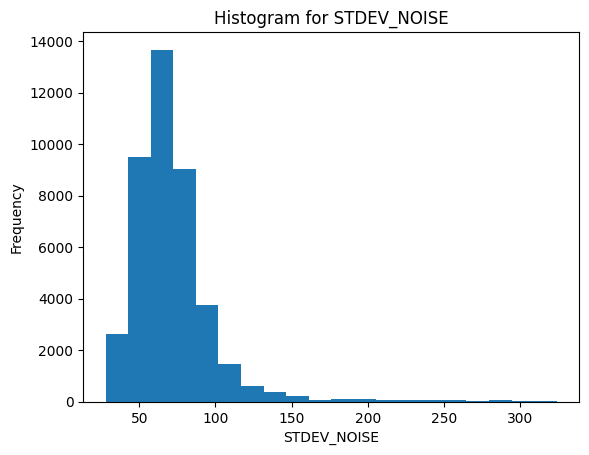

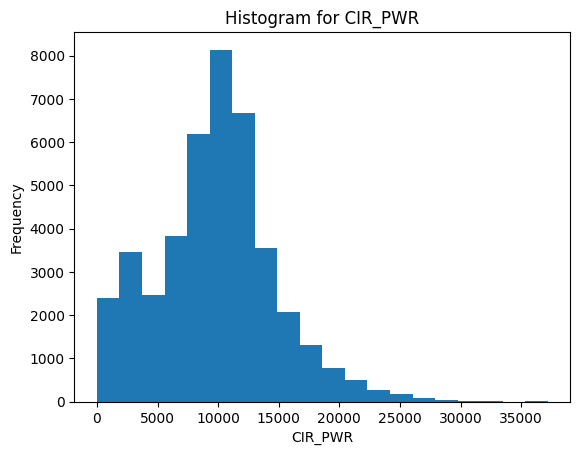

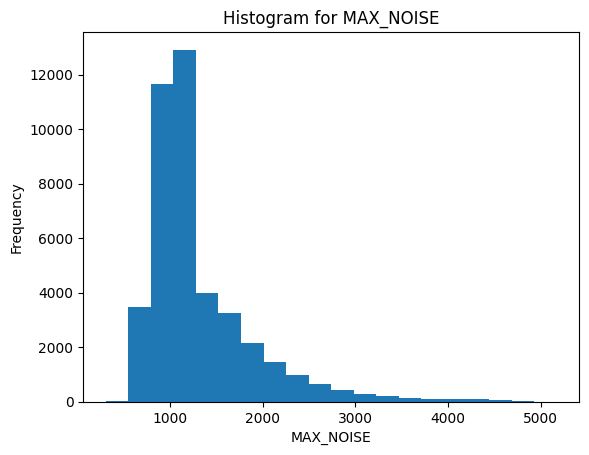

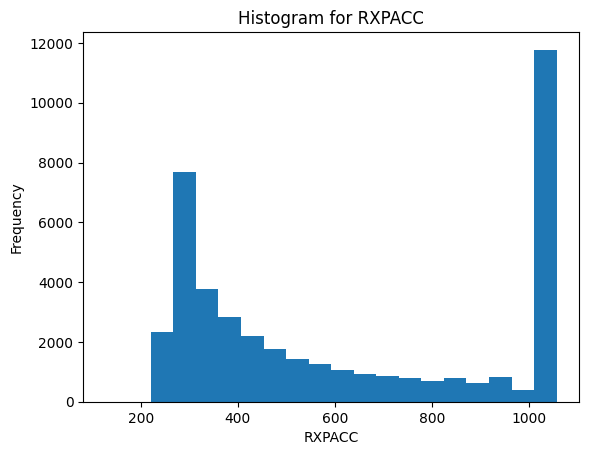

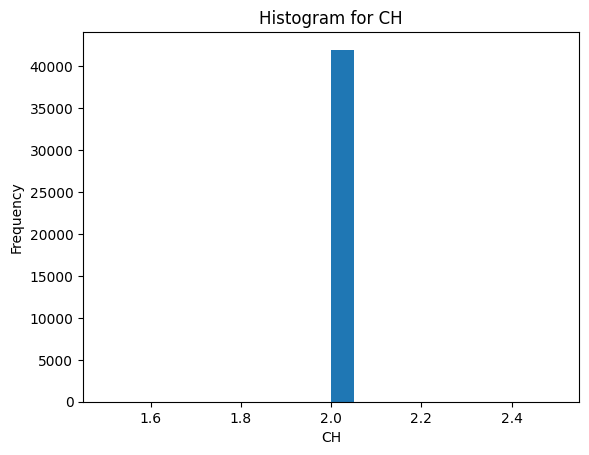

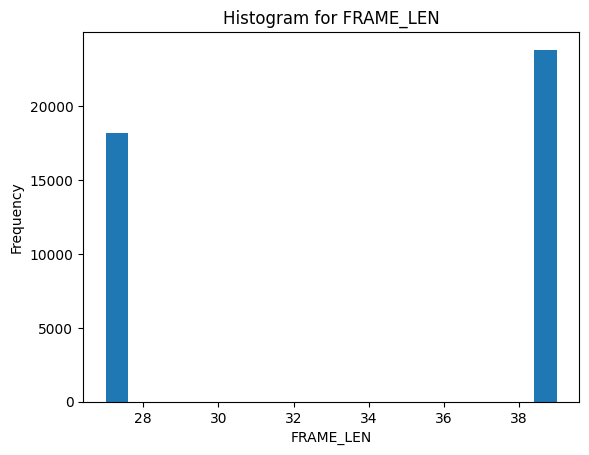

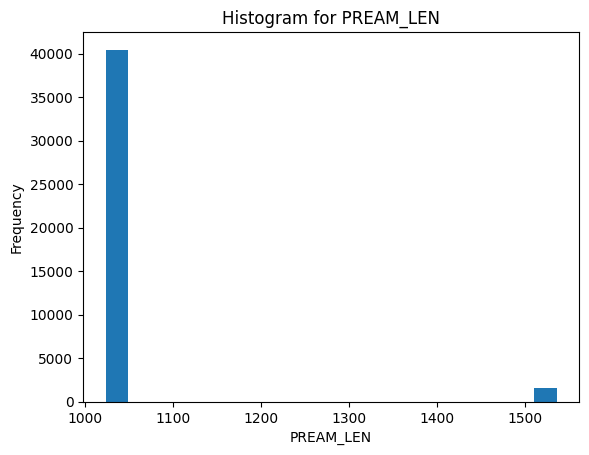

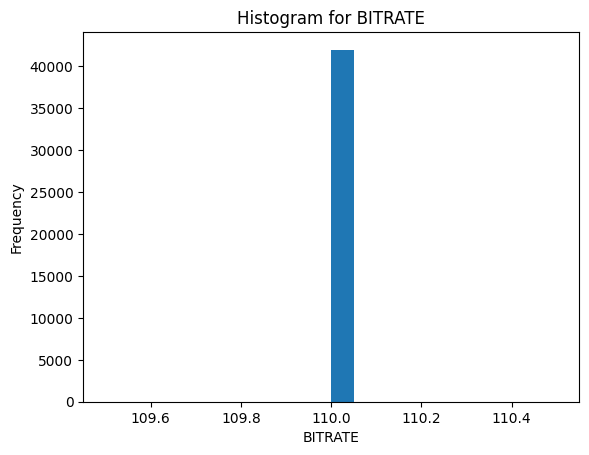

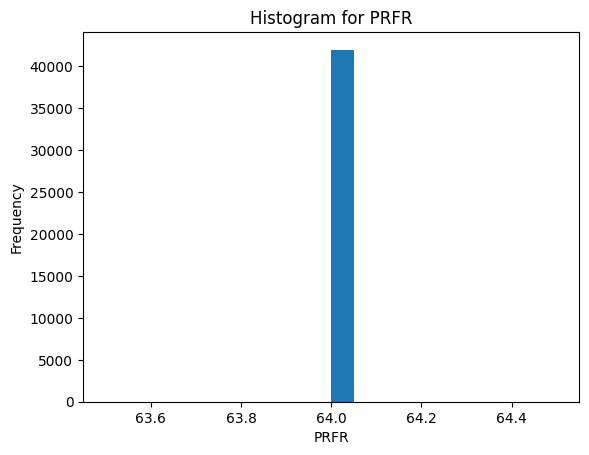

In [13]:
# Visualise distribution of each feature using boxplot
plt.figure(figsize=(20, 10))
df_original.iloc[:, :15].boxplot()
plt.show()

# Visualise distribution of each feature using histogram (exclude first class column)
for column in df_original.iloc[:, :15].columns[1:]:
    plt.hist(df_original.iloc[:, :15][column], 20)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#### Anomaly Detection using Mahalanobis Distancing

In [14]:
pass

### Feature Creation

#### Feature Creation (Non-CIR)
We will first perform feature creation for Non-CIR features. Based on the domain knowledge derived from *Section 4.7* of the Decawave DWM1000 Radio Module's manual [[3]](#references), we can create additional features, `FP_POWER` (First Path Power Level), `RX_POWER` (Receive Signal Power Level) and `D_POWER` (difference between `FP_POWER` and `RX_POWER`).

In [15]:
# Extract Non-CIR features from the dataset
df_noncir = df_original.iloc[:, :15].copy()
df_noncir

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR
0,1.0,5.43,741.0,3561.0,5533.0,4948.0,88.0,1788.0,1289.0,1024.0,2.0,27.0,1024.0,110.0,64.0
1,1.0,6.04,743.0,8685.0,5344.0,8535.0,176.0,6103.0,2713.0,1024.0,2.0,39.0,1024.0,110.0,64.0
2,1.0,2.72,746.0,6445.0,19438.0,16356.0,32.0,7925.0,741.0,329.0,2.0,39.0,1024.0,110.0,64.0
3,1.0,9.33,745.0,7616.0,4470.0,2439.0,76.0,9447.0,1152.0,1024.0,2.0,39.0,1024.0,110.0,64.0
4,1.0,1.36,750.0,9729.0,16896.0,12385.0,64.0,6993.0,1548.0,280.0,2.0,39.0,1024.0,110.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,6.43,747.0,11328.0,16771.0,10854.0,72.0,9340.0,1082.0,952.0,2.0,27.0,1024.0,110.0,64.0
41996,0.0,1.76,744.0,12940.0,15009.0,15644.0,48.0,10151.0,1097.0,289.0,2.0,39.0,1024.0,110.0,64.0
41997,0.0,1.45,748.0,10061.0,18742.0,14321.0,56.0,10173.0,1509.0,276.0,2.0,39.0,1024.0,110.0,64.0
41998,0.0,4.87,746.0,1751.0,12755.0,16031.0,52.0,11843.0,830.0,453.0,2.0,39.0,1024.0,110.0,64.0


##### Feature Creation: `FP_POWER` (First Path Power Level)
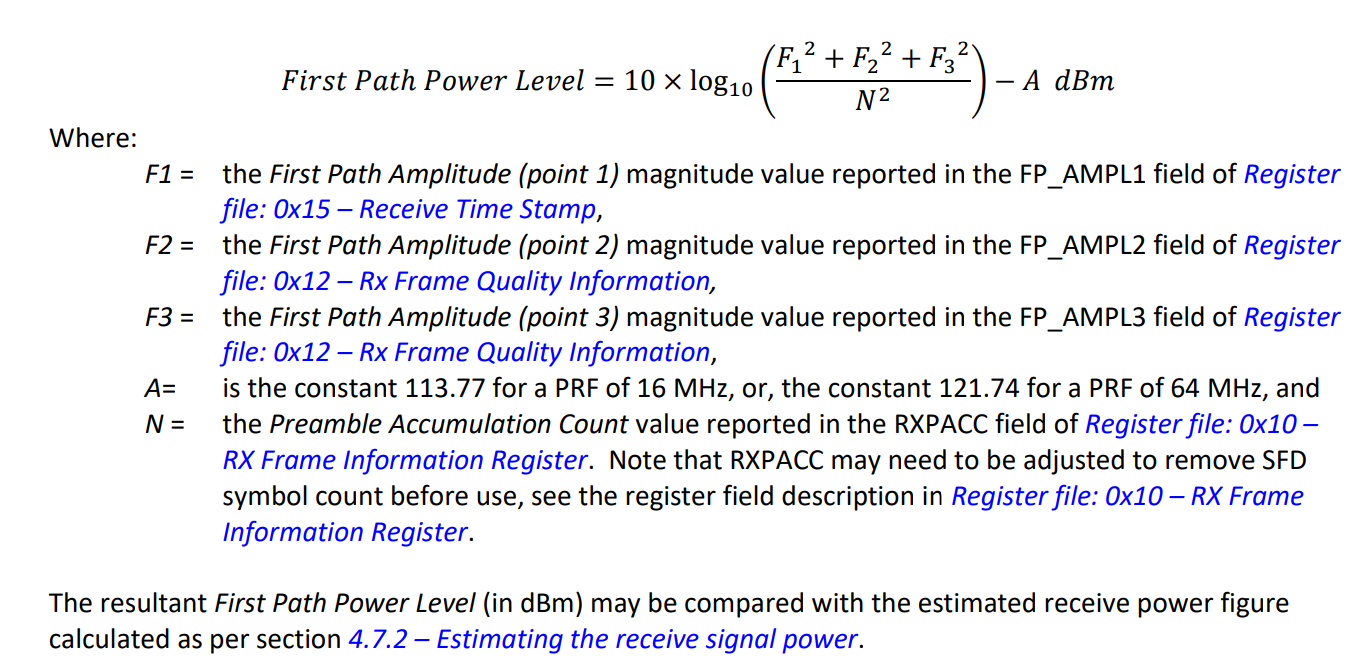

- $F_1$: `FP_AMP1`
- $F_2$: `FP_AMP2`
- $F_3$: `FP_AMP3`
- $N$: `RXPACC`
- $A$: 121.74 (constant value for `PRFR` of 64MHz)

In [16]:
# Define value of constant A, based on pulse repetition frequency rate
constant_a = 121.74 if df_noncir['PRFR'][0] == 64.0 else 113.77 if df_noncir['PRFR'][0] == 16.0 else 0

# Initialise FP_POWER
df_noncir['FP_POWER'] = 0.0

# Compute numerator and denominator
numerator = (df_noncir['FP_AMP1']**2) + (df_noncir['FP_AMP2']**2) + (df_noncir['FP_AMP3']**2)
denominator = df_noncir['RXPACC']**2

# Compute FP_POWER (First Path Power Level), ensuring that the numerator is not 0 to prevent log10(0) error
df_noncir.loc[numerator != 0.0, 'FP_POWER'] = 10 * np.log10(numerator / denominator) - constant_a
df_noncir

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER
0,1.0,5.43,741.0,3561.0,5533.0,4948.0,88.0,1788.0,1289.0,1024.0,2.0,27.0,1024.0,110.0,64.0,-103.635143
1,1.0,6.04,743.0,8685.0,5344.0,8535.0,176.0,6103.0,2713.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-99.470347
2,1.0,2.72,746.0,6445.0,19438.0,16356.0,32.0,7925.0,741.0,329.0,2.0,39.0,1024.0,110.0,64.0,-83.715030
3,1.0,9.33,745.0,7616.0,4470.0,2439.0,76.0,9447.0,1152.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-102.706668
4,1.0,1.36,750.0,9729.0,16896.0,12385.0,64.0,6993.0,1548.0,280.0,2.0,39.0,1024.0,110.0,64.0,-83.411682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,6.43,747.0,11328.0,16771.0,10854.0,72.0,9340.0,1082.0,952.0,2.0,27.0,1024.0,110.0,64.0,-94.091343
41996,0.0,1.76,744.0,12940.0,15009.0,15644.0,48.0,10151.0,1097.0,289.0,2.0,39.0,1024.0,110.0,64.0,-82.913506
41997,0.0,1.45,748.0,10061.0,18742.0,14321.0,56.0,10173.0,1509.0,276.0,2.0,39.0,1024.0,110.0,64.0,-82.378713
41998,0.0,4.87,746.0,1751.0,12755.0,16031.0,52.0,11843.0,830.0,453.0,2.0,39.0,1024.0,110.0,64.0,-88.601138


In [17]:
# Check for records with zero FP_POWER (default value assigned for rows with zero-valued FP_AMP* or RXPACC)
df_noncir[df_noncir['FP_POWER'] == 0]

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER


#### Feature Creation: `RX_POWER` (Receive Signal Power Level)
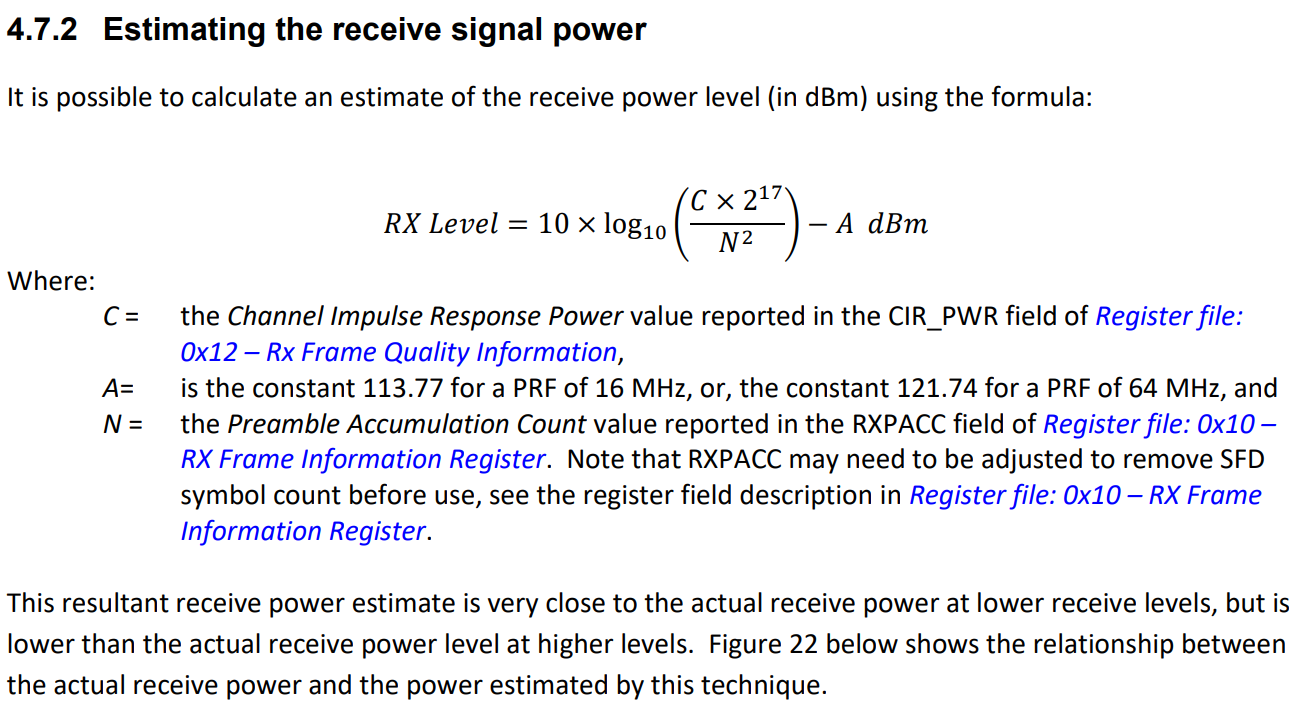

- $C$: `CIR_PWR`
- $N$: `RXPACC`
- $A$: 121.74 (constant value for `PRFR` of 64MHz)

In [18]:
# Define value of constant A, based on pulse repetition frequency rate
constant_a = 121.74 if df_original['PRFR'][0] == 64.0 else 113.77 if df_original['PRFR'][0] == 16.0 else 0

# Initialise RX_POWER
df_noncir['RX_POWER'] = 0.0

# Compute numerator and denominator
numerator = df_noncir['CIR_PWR'] * (2**17)
denominator = df_noncir['RXPACC']**2

# Suppress divide by zero warning
with np.errstate(divide='ignore'):
    # Compute RX_POWER (Receive Signal Power Level), ensuring that the numerator is not 0 to prevent log10(0) error (RuntimeWarning will be raised, but can be ignored)
    df_noncir.loc[numerator != 0.0, 'RX_POWER'] = 10 * np.log10(numerator / denominator) - constant_a
df_noncir

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER,RX_POWER
0,1.0,5.43,741.0,3561.0,5533.0,4948.0,88.0,1788.0,1289.0,1024.0,2.0,27.0,1024.0,110.0,64.0,-103.635143,-98.247225
1,1.0,6.04,743.0,8685.0,5344.0,8535.0,176.0,6103.0,2713.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-99.470347,-92.915466
2,1.0,2.72,746.0,6445.0,19438.0,16356.0,32.0,7925.0,741.0,329.0,2.0,39.0,1024.0,110.0,64.0,-83.715030,-81.918826
3,1.0,9.33,745.0,7616.0,4470.0,2439.0,76.0,9447.0,1152.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-102.706668,-91.017961
4,1.0,1.36,750.0,9729.0,16896.0,12385.0,64.0,6993.0,1548.0,280.0,2.0,39.0,1024.0,110.0,64.0,-83.411682,-81.061426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,6.43,747.0,11328.0,16771.0,10854.0,72.0,9340.0,1082.0,952.0,2.0,27.0,1024.0,110.0,64.0,-94.091343,-90.434171
41996,0.0,1.76,744.0,12940.0,15009.0,15644.0,48.0,10151.0,1097.0,289.0,2.0,39.0,1024.0,110.0,64.0,-82.913506,-79.717769
41997,0.0,1.45,748.0,10061.0,18742.0,14321.0,56.0,10173.0,1509.0,276.0,2.0,39.0,1024.0,110.0,64.0,-82.378713,-79.308592
41998,0.0,4.87,746.0,1751.0,12755.0,16031.0,52.0,11843.0,830.0,453.0,2.0,39.0,1024.0,110.0,64.0,-88.601138,-82.952247


In [19]:
# Check for records with zero RX_POWER (default value assigned for rows with zero-valued CIR_PWR or RXPACC)
df_noncir[df_noncir['RX_POWER'] == 0]

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER,RX_POWER
424,1.0,7.02,757.0,30.0,214.0,413.0,36.0,0.0,412.0,192.0,2.0,39.0,1024.0,110.0,64.0,-114.036127,0.0
16477,1.0,4.88,739.0,112.0,323.0,227.0,40.0,0.0,322.0,128.0,2.0,39.0,1024.0,110.0,64.0,-111.620727,0.0
22421,1.0,6.33,747.0,293.0,311.0,187.0,28.0,0.0,310.0,160.0,2.0,27.0,1024.0,110.0,64.0,-112.447028,0.0


#### Feature Creation: `D_POWER` (Difference between `FP_POWER` and `RX_POWER`)
$D$: `RX_POWER` - `FP_POWER`

In [20]:
# Compute D_POWER (difference between FP_POWER and RX_POWER)
df_noncir['D_POWER'] = df_noncir['RX_POWER'] - df_noncir['FP_POWER']
df_noncir

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER,RX_POWER,D_POWER
0,1.0,5.43,741.0,3561.0,5533.0,4948.0,88.0,1788.0,1289.0,1024.0,2.0,27.0,1024.0,110.0,64.0,-103.635143,-98.247225,5.387918
1,1.0,6.04,743.0,8685.0,5344.0,8535.0,176.0,6103.0,2713.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-99.470347,-92.915466,6.554881
2,1.0,2.72,746.0,6445.0,19438.0,16356.0,32.0,7925.0,741.0,329.0,2.0,39.0,1024.0,110.0,64.0,-83.715030,-81.918826,1.796204
3,1.0,9.33,745.0,7616.0,4470.0,2439.0,76.0,9447.0,1152.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-102.706668,-91.017961,11.688707
4,1.0,1.36,750.0,9729.0,16896.0,12385.0,64.0,6993.0,1548.0,280.0,2.0,39.0,1024.0,110.0,64.0,-83.411682,-81.061426,2.350256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,6.43,747.0,11328.0,16771.0,10854.0,72.0,9340.0,1082.0,952.0,2.0,27.0,1024.0,110.0,64.0,-94.091343,-90.434171,3.657172
41996,0.0,1.76,744.0,12940.0,15009.0,15644.0,48.0,10151.0,1097.0,289.0,2.0,39.0,1024.0,110.0,64.0,-82.913506,-79.717769,3.195737
41997,0.0,1.45,748.0,10061.0,18742.0,14321.0,56.0,10173.0,1509.0,276.0,2.0,39.0,1024.0,110.0,64.0,-82.378713,-79.308592,3.070121
41998,0.0,4.87,746.0,1751.0,12755.0,16031.0,52.0,11843.0,830.0,453.0,2.0,39.0,1024.0,110.0,64.0,-88.601138,-82.952247,5.648891


#### Preliminary Feature Analysis: Created Non-CIR Features
Based on the domain knowledge derived from *Section 4.7* of the Decawave DWM1000 Radio Module's manual [[3]](#references), the computed `D_POWER` can be used as a potential feature for LOS/NLOS classification through the assessment of the quality of message reception and RX timestamp.

According to the manual:
- If `D_POWER` < 6dB, it is likely to be LOS
- If `D_POWER` > 10dB, it is likely to be NLOS

In [21]:
# Analysis of D_POWER - NLOS/LOS Class
# If D_POWER < 6dB, LOS
print("D_POWER < 6dB (Supposed to be LOS)")
# print(df_noncir[df_noncir['D_POWER'] < 6.0]['NLOS'].value_counts())
print({label: f"{count} ({(count / len(df_noncir[df_noncir['D_POWER'] < 6.0]['NLOS']) * 100):.2f}%)" for label, count in df_noncir[df_noncir['D_POWER'] < 6.0]['NLOS'].value_counts().items()})

# If D_POWER > 10dB, NLOS
print("\nD_POWER > 10dB (Supposed to be NLOS)")
# print(df_noncir[df_noncir['D_POWER'] > 10.0]['NLOS'].value_counts())
print({label: f"{count} ({(count / len(df_noncir[df_noncir['D_POWER'] > 10.0]['NLOS']) * 100):.2f}%)" for label, count in df_noncir[df_noncir['D_POWER'] > 10.0]['NLOS'].value_counts().items()})

D_POWER < 6dB (Supposed to be LOS)
{0.0: '14910 (66.00%)', 1.0: '7682 (34.00%)'}

D_POWER > 10dB (Supposed to be NLOS)
{1.0: '8125 (80.52%)', 0.0: '1966 (19.48%)'}


We observe that the manual's specifications on the relation between the `D_POWER` feature values and the `NLOS` class is relatively correct. We can use `D_POWER` as one of the features for training our classifier models.

#### Feature Creation: `D_POWER_LOS` and `D_POWER_NLOS`
Since the threshold values provided by the manual is relatively successful in LOS/NLOS classification, we will create one-hot columns based on these thresholds for training our classifier models. These one-hot columns are used to eliminate potential ordinal assumptions by classifiers, helping to enhance the interpretability of the dataset and improve model performance.

- `D_POWER_LOS`
    - 0: Value of `D_POWER` is $\lt$ 6dB
    - 1: Value of `D_POWER` is $\geq$ 6dB
- `D_POWER_NLOS`
    - 1: Value of `D_POWER` is $\gt$ 10dB
    - 0: Value of `D_POWER` is $\leq$ 10dB

In [22]:
# Create one-hot columns based on the D_POWER thresholds
df_noncir['D_POWER_LOS'] = (df_noncir['D_POWER'] < 6.0).astype(int)
df_noncir['D_POWER_NLOS'] = (df_noncir['D_POWER'] > 10.0).astype(int)
df_noncir

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER,RX_POWER,D_POWER,D_POWER_LOS,D_POWER_NLOS
0,1.0,5.43,741.0,3561.0,5533.0,4948.0,88.0,1788.0,1289.0,1024.0,2.0,27.0,1024.0,110.0,64.0,-103.635143,-98.247225,5.387918,1,0
1,1.0,6.04,743.0,8685.0,5344.0,8535.0,176.0,6103.0,2713.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-99.470347,-92.915466,6.554881,0,0
2,1.0,2.72,746.0,6445.0,19438.0,16356.0,32.0,7925.0,741.0,329.0,2.0,39.0,1024.0,110.0,64.0,-83.715030,-81.918826,1.796204,1,0
3,1.0,9.33,745.0,7616.0,4470.0,2439.0,76.0,9447.0,1152.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-102.706668,-91.017961,11.688707,0,1
4,1.0,1.36,750.0,9729.0,16896.0,12385.0,64.0,6993.0,1548.0,280.0,2.0,39.0,1024.0,110.0,64.0,-83.411682,-81.061426,2.350256,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,6.43,747.0,11328.0,16771.0,10854.0,72.0,9340.0,1082.0,952.0,2.0,27.0,1024.0,110.0,64.0,-94.091343,-90.434171,3.657172,1,0
41996,0.0,1.76,744.0,12940.0,15009.0,15644.0,48.0,10151.0,1097.0,289.0,2.0,39.0,1024.0,110.0,64.0,-82.913506,-79.717769,3.195737,1,0
41997,0.0,1.45,748.0,10061.0,18742.0,14321.0,56.0,10173.0,1509.0,276.0,2.0,39.0,1024.0,110.0,64.0,-82.378713,-79.308592,3.070121,1,0
41998,0.0,4.87,746.0,1751.0,12755.0,16031.0,52.0,11843.0,830.0,453.0,2.0,39.0,1024.0,110.0,64.0,-88.601138,-82.952247,5.648891,1,0


We will now preview the Non-CIR dataset after the Feature Creation process.

In [23]:
# Preview features
print("Non-CIR Features after feature creation:\n", df_noncir.columns, end='\n\n')

# Preview data
print("Non-CIR Dataset after feature creation:")
df_noncir

Non-CIR Features after feature creation:
 Index(['NLOS', 'RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3',
       'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC', 'CH', 'FRAME_LEN',
       'PREAM_LEN', 'BITRATE', 'PRFR', 'FP_POWER', 'RX_POWER', 'D_POWER',
       'D_POWER_LOS', 'D_POWER_NLOS'],
      dtype='object')

Non-CIR Dataset after feature creation:


,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER,RX_POWER,D_POWER,D_POWER_LOS,D_POWER_NLOS
0,1.0,5.43,741.0,3561.0,5533.0,4948.0,88.0,1788.0,1289.0,1024.0,2.0,27.0,1024.0,110.0,64.0,-103.635143,-98.247225,5.387918,1,0
1,1.0,6.04,743.0,8685.0,5344.0,8535.0,176.0,6103.0,2713.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-99.470347,-92.915466,6.554881,0,0
2,1.0,2.72,746.0,6445.0,19438.0,16356.0,32.0,7925.0,741.0,329.0,2.0,39.0,1024.0,110.0,64.0,-83.715030,-81.918826,1.796204,1,0
3,1.0,9.33,745.0,7616.0,4470.0,2439.0,76.0,9447.0,1152.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-102.706668,-91.017961,11.688707,0,1
4,1.0,1.36,750.0,9729.0,16896.0,12385.0,64.0,6993.0,1548.0,280.0,2.0,39.0,1024.0,110.0,64.0,-83.411682,-81.061426,2.350256,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,6.43,747.0,11328.0,16771.0,10854.0,72.0,9340.0,1082.0,952.0,2.0,27.0,1024.0,110.0,64.0,-94.091343,-90.434171,3.657172,1,0
41996,0.0,1.76,744.0,12940.0,15009.0,15644.0,48.0,10151.0,1097.0,289.0,2.0,39.0,1024.0,110.0,64.0,-82.913506,-79.717769,3.195737,1,0
41997,0.0,1.45,748.0,10061.0,18742.0,14321.0,56.0,10173.0,1509.0,276.0,2.0,39.0,1024.0,110.0,64.0,-82.378713,-79.308592,3.070121,1,0
41998,0.0,4.87,746.0,1751.0,12755.0,16031.0,52.0,11843.0,830.0,453.0,2.0,39.0,1024.0,110.0,64.0,-88.601138,-82.952247,5.648891,1,0


#### Feature Creation (CIR)
Next, we perform feature creation for Non-CIR features. The main goal of this step is to obtain single-valued measures of statistical tendencies to represent the 1016 CIR features.
- `CIR_PEAK_VALUE`
    - Maximum CIR sample value
- `CIR_ENERGY_SUM`
    - Sum of CIR sample values
- `CIR_EARLY_ENERGY`
    - Sum of the first n-CIR sample values

- `CIR_MEAN`
    - Mean of CIR sample values

- `CIR_VARIANCE`
    - Variance of CIR sample values

- `CIR_SKEWNESS`
    - Skewness of CIR sample values

- `CIR_KURTOSIS`
    - Kurtosis of CIR sample values

In [24]:
# Extract CIR features from the dataset
df_cir = df_original.iloc[:, 15:].copy()
df_cir

,CIR0,CIR1,CIR2,CIR3,CIR4,CIR5,CIR6,CIR7,CIR8,CIR9,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
0,299.0,225.0,200.0,378.0,62.0,114.0,230.0,177.0,238.0,448.0,...,249.0,304.0,211.0,67.0,104.0,297.0,351.0,101.0,204.0,0.0
1,550.0,313.0,737.0,416.0,643.0,528.0,537.0,994.0,708.0,94.0,...,463.0,958.0,333.0,160.0,498.0,529.0,359.0,1005.0,448.0,512.0
2,140.0,300.0,280.0,331.0,237.0,167.0,96.0,99.0,39.0,127.0,...,190.0,89.0,150.0,108.0,268.0,99.0,9.0,231.0,240.0,0.0
3,467.0,265.0,410.0,376.0,233.0,214.0,470.0,359.0,342.0,172.0,...,302.0,242.0,468.0,549.0,222.0,192.0,128.0,112.0,260.0,0.0
4,221.0,131.0,220.0,218.0,231.0,73.0,148.0,315.0,266.0,160.0,...,143.0,349.0,222.0,117.0,123.0,172.0,174.0,115.0,189.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,80.0,141.0,196.0,93.0,122.0,198.0,342.0,501.0,452.0,96.0,...,221.0,499.0,349.0,193.0,100.0,384.0,249.0,306.0,124.0,0.0
41996,173.0,136.0,251.0,260.0,245.0,88.0,93.0,244.0,249.0,301.0,...,207.0,130.0,261.0,252.0,206.0,246.0,225.0,233.0,244.0,256.0
41997,192.0,285.0,243.0,211.0,222.0,67.0,311.0,205.0,293.0,269.0,...,261.0,55.0,255.0,316.0,205.0,241.0,196.0,318.0,265.0,0.0
41998,182.0,162.0,95.0,268.0,196.0,134.0,88.0,63.0,236.0,127.0,...,150.0,145.0,115.0,211.0,194.0,210.0,260.0,110.0,166.0,0.0


#### Feature Creation: `CIR_PEAK_VALUE`, `CIR_ENERGY_SUM`, `CIR_EARLY_ENERGY`, `CIR_MEAN`, `CIR_VARIANCE`, `CIR_SKEWNESS` & `CIR_KURTOSIS`

In [25]:
# Peak Value (maximum CIR sample value)
df_cir_stats = pd.DataFrame({'CIR_PEAK_VALUE': df_cir.max(axis=1)})

# Energy Sum (sum of CIR sample values)
df_cir_stats['CIR_ENERGY_SUM'] = df_cir.sum(axis=1)

# Early Energy Sum: Calculate the sum of the first N CIR measurements (sum of the first CIR sample values)
N = 100
early_df_cir = df_cir.iloc[:, :N]
df_cir_stats['CIR_EARLY_ENERGY'] = early_df_cir.sum(axis=1)

# Mean Value (mean of CIR sample values)
df_cir_stats['CIR_MEAN'] = df_cir.mean(axis=1)    

# Variance (variance of CIR sample values)
df_cir_stats['CIR_VARIANCE'] = df_cir.var(axis=1)

# Skewness (skewness of CIR sample values)
df_cir_stats['CIR_SKEWNESS'] = df_cir.skew(axis=1)

# Kurtosis (kurtosis of CIR sample values)
df_cir_stats['CIR_KURTOSIS'] = df_cir.kurtosis(axis=1)

We will now preview the CIR dataset after the Feature Creation process.

In [26]:
# Preview features
print("CIR (Statistics) Features after feature creation:\n", df_cir_stats.columns, end='\n\n')

# Preview data
print("CIR (Statistics) Dataset after feature creation:")
df_cir_stats

CIR (Statistics) Features after feature creation:
 Index(['CIR_PEAK_VALUE', 'CIR_ENERGY_SUM', 'CIR_EARLY_ENERGY', 'CIR_MEAN',
       'CIR_VARIANCE', 'CIR_SKEWNESS', 'CIR_KURTOSIS'],
      dtype='object')

CIR (Statistics) Dataset after feature creation:


,CIR_PEAK_VALUE,CIR_ENERGY_SUM,CIR_EARLY_ENERGY,CIR_MEAN,CIR_VARIANCE,CIR_SKEWNESS,CIR_KURTOSIS
0,6048.0,365969.0,25358.0,360.205709,2.268206e+05,7.528980,67.988425
1,15387.0,627958.0,58603.0,618.068898,8.030750e+05,8.982373,105.208388
2,18495.0,307792.0,19163.0,302.944882,1.080892e+06,12.684404,184.119272
3,13109.0,526594.0,29788.0,518.301181,1.149709e+06,6.373485,47.871433
4,16621.0,334504.0,20900.0,329.236220,8.665747e+05,11.243298,148.415674
...,...,...,...,...,...,...,...
41995,16766.0,411364.0,26590.0,404.885827,1.175320e+06,10.248015,120.739871
41996,16970.0,349585.0,19167.0,344.079724,1.236574e+06,11.106791,137.465327
41997,18350.0,347821.0,21197.0,342.343504,1.271501e+06,12.093356,160.947241
41998,18341.0,402905.0,20410.0,396.560039,1.534938e+06,9.981667,113.708492


#### Feature Reduction
The goal of this step is reduce the 1016 CIR features through dimension reduction using Principal Component Analysis (PCA). We aim to capture 95% total variance explained by the chosen principal components.

Firstly, we check the minimum number of principal components needed to capture 95% total eigen energy variance of the CIR features.

Eigen Variance Energy Ratio:
 [0.24831053 0.13785494 0.10731537 0.06606893 0.04480073 0.03699656
 0.03264655 0.02959236 0.0266203  0.0227534  0.02063685 0.01841325
 0.01622003 0.01436552 0.01309912 0.01132877 0.01035855 0.00918877
 0.00852882 0.00761432 0.00715507 0.00643838 0.00589289 0.00521955
 0.00470025 0.00440181 0.00420683 0.00379819 0.00348356 0.00313867
 0.00289335 0.00275437 0.0026677  0.00232569 0.00219706 0.00194057
 0.00183719 0.00165716 0.00155956 0.00138781 0.00136938 0.00128384
 0.00122022 0.00111084 0.0010214  0.00096222 0.00088776 0.00085984
 0.00082582 0.00078158]

Cumulative Eigen Variance Energy Ratio:
 [0.24831053 0.38616547 0.49348084 0.55954978 0.6043505  0.64134706
 0.67399361 0.70358597 0.73020627 0.75295967 0.77359652 0.79200976
 0.8082298  0.82259532 0.83569444 0.84702321 0.85738176 0.86657052
 0.87509934 0.88271366 0.88986873 0.89630711 0.9022     0.90741955
 0.9121198  0.91652161 0.92072844 0.92452663 0.92801019 0.93114887
 0.93404222 0.93679659 0.93946429

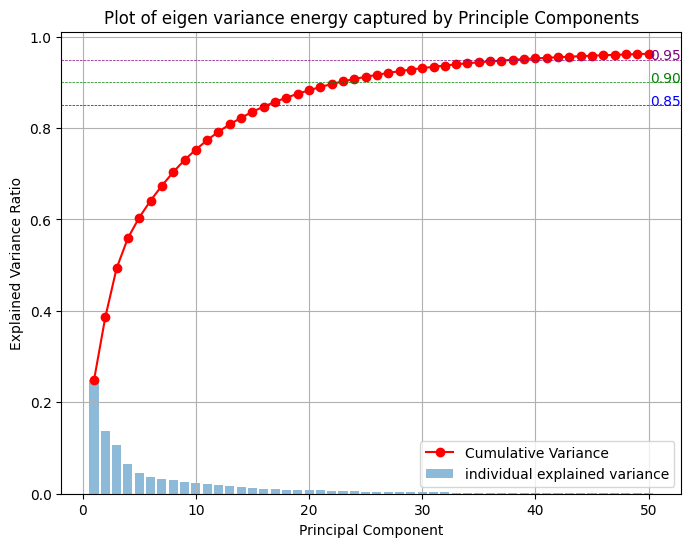

In [27]:
# Define PCA object (all components are kept since n_components is not set)
pca = PCA()
pca.fit(df_cir)

# Calculate explained variance ratio (eigen energy)
eigen_energy = pca.explained_variance_ratio_[:50]   # Consider only the first 50 components
cumulative_variance = np.cumsum(eigen_energy)       # Cumulative explained variance
print("Eigen Variance Energy Ratio:\n", eigen_energy, end="\n\n")
print("Cumulative Eigen Variance Energy Ratio:\n", cumulative_variance, end="\n\n")

# Get minimum PC for minimum required total variance energy
min_pc = 0
for idx, i in enumerate(cumulative_variance):
    if(i >= MIN_PC_VARIANCE_ENERGY):
        min_pc = idx + 1
        print("Minimum PCs required:", min_pc)
        print("Total Captured Variance Energy:", i, end="\n\n")
        break

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigen_energy) + 1), eigen_energy, alpha=0.5, align='center', label=f'individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='red', marker='o', label='Cumulative Variance')

# Plot horizontal lines for specified thresholds
thresholds = [0.85, 0.90, 0.95]
threshold_colors = ['blue', 'green', 'purple']
for threshold, color in zip(thresholds, threshold_colors):
    plt.axhline(y=threshold, color=color, linestyle='--', linewidth=0.5)
    plt.text(len(cumulative_variance) + 0.1, threshold, f'{threshold:.2f}', color=color)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title(f"Plot of eigen variance energy captured by Principle Components")
plt.legend()
plt.grid(True)
plt.show()

We observe that  _component = 39_ gives the required 95% accumulated variance. Next, we will perform dimension reduction using the chosen number of PCs.

In [28]:
# Reinitialise PCA instance
pca = PCA(n_components=min_pc)
df_cir_pca = pca.fit_transform(df_cir)

# Create a DataFrame for the PCA-transformed features
pca_columns = [f'PC{i+1}' for i in range(min_pc)]  
df_cir_pca = pd.DataFrame(df_cir_pca, columns=pca_columns)
df_cir_pca


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
0,-9660.094269,-15729.298731,1839.794975,-499.751728,202.826600,1675.326614,-1785.370099,-392.129039,-685.153854,126.459922,...,269.415167,-45.425014,-1260.128302,898.065686,327.377073,-44.218149,48.212069,734.353031,-169.134016,-147.301375
1,-12227.382900,-2167.823401,4971.685461,4860.042088,-2035.579326,2436.619022,-4526.543149,-905.189729,2893.068300,-1475.147726,...,-650.194362,-644.286444,-748.725184,486.831854,-216.854388,-379.985161,1193.851708,-779.143315,-67.280364,413.730027
2,-16120.185059,6310.242995,-4868.276403,-4087.074722,-4563.520056,4952.076341,-6787.784715,888.350992,-3433.323455,69.328906,...,-591.967136,-843.307050,-282.151797,90.530341,-406.702893,432.603395,521.453784,62.186847,776.622925,469.400599
3,5070.456384,960.153639,9023.585856,-9315.499622,1391.148191,-1090.619348,-494.566857,2952.986704,-1116.050537,4293.687280,...,991.905541,79.733895,-340.631157,-41.810524,720.297552,-50.672111,1307.768367,984.148473,886.584439,-791.090791
4,6347.835083,-8239.209962,-5530.136358,-774.516713,9205.184555,3540.856159,-5966.233100,272.380407,-2384.808918,4676.676484,...,746.421737,-451.830235,-278.732964,667.101789,-249.273934,-404.434845,525.538817,702.034421,-622.738835,-185.623636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,-1905.300556,6009.761472,-6992.407061,-3159.551930,-4332.216409,4300.734548,-6661.175412,-4980.131635,-552.797221,4911.034503,...,-372.780746,-155.296156,255.706974,81.445104,124.725805,-31.150314,-293.122959,-52.771241,73.152777,119.256544
41996,-19854.764458,3118.792197,2930.699535,1960.388424,1534.005212,-666.708532,3119.801302,-7229.039793,6047.107116,7996.683947,...,-767.873684,302.221636,-257.568059,375.783947,-549.607611,377.799626,-209.207685,-196.474261,223.780876,404.479607
41997,1088.680982,4098.510751,-14808.049756,-2814.156535,-468.939768,93.090214,-601.980699,-565.541820,7825.216075,7007.958487,...,-186.350345,-540.396165,168.020448,836.833535,489.072413,297.501788,881.956316,-319.644143,-710.651394,743.089088
41998,-2495.003703,7051.240507,1010.967060,10874.004858,-1717.550064,6292.947805,-13096.339969,2006.116112,830.047119,127.024500,...,-175.521589,-120.154355,482.117465,669.355518,169.173315,-576.469721,-269.045177,98.468248,712.543621,-1342.280539


We will now view the results of the CIR dataset after the Feature Reduction process.

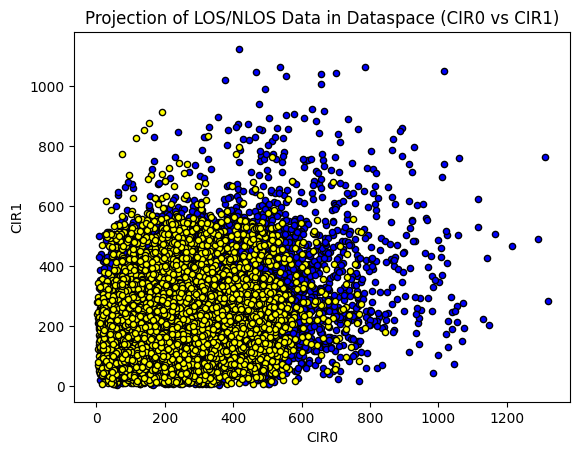

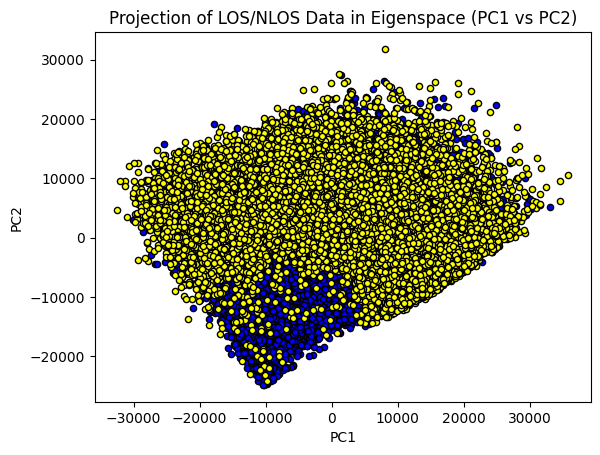

In [29]:
# Create temporary dataframe for PCA-ed features with LOS/NLOS class
df_cir_pca_temp = pd.concat([df_original.iloc[:, :1], df_cir_pca], axis=1)

# Filters for each class
class_nlos = (df_original['NLOS'] == 1)
class_los = (df_original['NLOS'] == 0)

# Plot features against each other (x-axis, y-axis)
plt.scatter(df_original[class_nlos]['CIR0'], df_original[class_nlos]['CIR1'], c="blue", s=20, edgecolor='k')
plt.scatter(df_original[class_los]['CIR0'], df_original[class_los]['CIR1'], c="yellow",s=20, edgecolor='k')
plt.xlabel("CIR0")
plt.ylabel("CIR1")
plt.title("Projection of LOS/NLOS Data in Dataspace (CIR0 vs CIR1)")
plt.show()

# Plot features against each other (x-axis, y-axis)
plt.scatter(df_cir_pca_temp[class_nlos]['PC1'], df_cir_pca_temp[class_nlos]['PC2'], c="blue",s=20, edgecolor='k')
plt.scatter(df_cir_pca_temp[class_los]['PC1'], df_cir_pca_temp[class_los]['PC2'], c="yellow",s=20, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of LOS/NLOS Data in Eigenspace (PC1 vs PC2)')
plt.show()

In [30]:
# Preview features
print("CIR Features after feature reduction:\n", df_cir_pca.columns, end='\n\n')

# Preview data
print("CIR Dataset after feature reduction:")
df_cir_pca

CIR Features after feature reduction:
 Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39'],
      dtype='object')

CIR Dataset after feature reduction:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
0,-9660.094269,-15729.298731,1839.794975,-499.751728,202.826600,1675.326614,-1785.370099,-392.129039,-685.153854,126.459922,...,269.415167,-45.425014,-1260.128302,898.065686,327.377073,-44.218149,48.212069,734.353031,-169.134016,-147.301375
1,-12227.382900,-2167.823401,4971.685461,4860.042088,-2035.579326,2436.619022,-4526.543149,-905.189729,2893.068300,-1475.147726,...,-650.194362,-644.286444,-748.725184,486.831854,-216.854388,-379.985161,1193.851708,-779.143315,-67.280364,413.730027
2,-16120.185059,6310.242995,-4868.276403,-4087.074722,-4563.520056,4952.076341,-6787.784715,888.350992,-3433.323455,69.328906,...,-591.967136,-843.307050,-282.151797,90.530341,-406.702893,432.603395,521.453784,62.186847,776.622925,469.400599
3,5070.456384,960.153639,9023.585856,-9315.499622,1391.148191,-1090.619348,-494.566857,2952.986704,-1116.050537,4293.687280,...,991.905541,79.733895,-340.631157,-41.810524,720.297552,-50.672111,1307.768367,984.148473,886.584439,-791.090791
4,6347.835083,-8239.209962,-5530.136358,-774.516713,9205.184555,3540.856159,-5966.233100,272.380407,-2384.808918,4676.676484,...,746.421737,-451.830235,-278.732964,667.101789,-249.273934,-404.434845,525.538817,702.034421,-622.738835,-185.623636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,-1905.300556,6009.761472,-6992.407061,-3159.551930,-4332.216409,4300.734548,-6661.175412,-4980.131635,-552.797221,4911.034503,...,-372.780746,-155.296156,255.706974,81.445104,124.725805,-31.150314,-293.122959,-52.771241,73.152777,119.256544
41996,-19854.764458,3118.792197,2930.699535,1960.388424,1534.005212,-666.708532,3119.801302,-7229.039793,6047.107116,7996.683947,...,-767.873684,302.221636,-257.568059,375.783947,-549.607611,377.799626,-209.207685,-196.474261,223.780876,404.479607
41997,1088.680982,4098.510751,-14808.049756,-2814.156535,-468.939768,93.090214,-601.980699,-565.541820,7825.216075,7007.958487,...,-186.350345,-540.396165,168.020448,836.833535,489.072413,297.501788,881.956316,-319.644143,-710.651394,743.089088
41998,-2495.003703,7051.240507,1010.967060,10874.004858,-1717.550064,6292.947805,-13096.339969,2006.116112,830.047119,127.024500,...,-175.521589,-120.154355,482.117465,669.355518,169.173315,-576.469721,-269.045177,98.468248,712.543621,-1342.280539


### Feature Analysis
At this stage, we will analyse all prepared features to determine their importance with regards to LOS/NLOS classification.

Preview the data subsets we have so far:
- `df_noncir`: Non-CIR Features
- `df_cir_stats`: Statistical measures on CIR Features
- `df_cir_pca`: PCA-ed CIR Features

**Note: Only `df_noncir` has the class feature `NLOS`*

In [41]:
print("Non-CIR Features")
df_noncir

Non-CIR Features


,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER,RX_POWER,D_POWER,D_POWER_LOS,D_POWER_NLOS
0,1.0,5.43,741.0,3561.0,5533.0,4948.0,88.0,1788.0,1289.0,1024.0,2.0,27.0,1024.0,110.0,64.0,-103.635143,-98.247225,5.387918,1,0
1,1.0,6.04,743.0,8685.0,5344.0,8535.0,176.0,6103.0,2713.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-99.470347,-92.915466,6.554881,0,0
2,1.0,2.72,746.0,6445.0,19438.0,16356.0,32.0,7925.0,741.0,329.0,2.0,39.0,1024.0,110.0,64.0,-83.715030,-81.918826,1.796204,1,0
3,1.0,9.33,745.0,7616.0,4470.0,2439.0,76.0,9447.0,1152.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-102.706668,-91.017961,11.688707,0,1
4,1.0,1.36,750.0,9729.0,16896.0,12385.0,64.0,6993.0,1548.0,280.0,2.0,39.0,1024.0,110.0,64.0,-83.411682,-81.061426,2.350256,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,6.43,747.0,11328.0,16771.0,10854.0,72.0,9340.0,1082.0,952.0,2.0,27.0,1024.0,110.0,64.0,-94.091343,-90.434171,3.657172,1,0
41996,0.0,1.76,744.0,12940.0,15009.0,15644.0,48.0,10151.0,1097.0,289.0,2.0,39.0,1024.0,110.0,64.0,-82.913506,-79.717769,3.195737,1,0
41997,0.0,1.45,748.0,10061.0,18742.0,14321.0,56.0,10173.0,1509.0,276.0,2.0,39.0,1024.0,110.0,64.0,-82.378713,-79.308592,3.070121,1,0
41998,0.0,4.87,746.0,1751.0,12755.0,16031.0,52.0,11843.0,830.0,453.0,2.0,39.0,1024.0,110.0,64.0,-88.601138,-82.952247,5.648891,1,0


In [42]:
print("CIR Statistical Measure Features")
df_cir_stats

CIR Statistical Measure Features


,CIR_PEAK_VALUE,CIR_ENERGY_SUM,CIR_EARLY_ENERGY,CIR_MEAN,CIR_VARIANCE,CIR_SKEWNESS,CIR_KURTOSIS
0,6048.0,365969.0,25358.0,360.205709,2.268206e+05,7.528980,67.988425
1,15387.0,627958.0,58603.0,618.068898,8.030750e+05,8.982373,105.208388
2,18495.0,307792.0,19163.0,302.944882,1.080892e+06,12.684404,184.119272
3,13109.0,526594.0,29788.0,518.301181,1.149709e+06,6.373485,47.871433
4,16621.0,334504.0,20900.0,329.236220,8.665747e+05,11.243298,148.415674
...,...,...,...,...,...,...,...
41995,16766.0,411364.0,26590.0,404.885827,1.175320e+06,10.248015,120.739871
41996,16970.0,349585.0,19167.0,344.079724,1.236574e+06,11.106791,137.465327
41997,18350.0,347821.0,21197.0,342.343504,1.271501e+06,12.093356,160.947241
41998,18341.0,402905.0,20410.0,396.560039,1.534938e+06,9.981667,113.708492


In [43]:
print("PCA-ed CIR Features")
df_cir_pca

PCA-ed CIR Features


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
0,-9660.094269,-15729.298731,1839.794975,-499.751728,202.826600,1675.326614,-1785.370099,-392.129039,-685.153854,126.459922,...,269.415167,-45.425014,-1260.128302,898.065686,327.377073,-44.218149,48.212069,734.353031,-169.134016,-147.301375
1,-12227.382900,-2167.823401,4971.685461,4860.042088,-2035.579326,2436.619022,-4526.543149,-905.189729,2893.068300,-1475.147726,...,-650.194362,-644.286444,-748.725184,486.831854,-216.854388,-379.985161,1193.851708,-779.143315,-67.280364,413.730027
2,-16120.185059,6310.242995,-4868.276403,-4087.074722,-4563.520056,4952.076341,-6787.784715,888.350992,-3433.323455,69.328906,...,-591.967136,-843.307050,-282.151797,90.530341,-406.702893,432.603395,521.453784,62.186847,776.622925,469.400599
3,5070.456384,960.153639,9023.585856,-9315.499622,1391.148191,-1090.619348,-494.566857,2952.986704,-1116.050537,4293.687280,...,991.905541,79.733895,-340.631157,-41.810524,720.297552,-50.672111,1307.768367,984.148473,886.584439,-791.090791
4,6347.835083,-8239.209962,-5530.136358,-774.516713,9205.184555,3540.856159,-5966.233100,272.380407,-2384.808918,4676.676484,...,746.421737,-451.830235,-278.732964,667.101789,-249.273934,-404.434845,525.538817,702.034421,-622.738835,-185.623636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,-1905.300556,6009.761472,-6992.407061,-3159.551930,-4332.216409,4300.734548,-6661.175412,-4980.131635,-552.797221,4911.034503,...,-372.780746,-155.296156,255.706974,81.445104,124.725805,-31.150314,-293.122959,-52.771241,73.152777,119.256544
41996,-19854.764458,3118.792197,2930.699535,1960.388424,1534.005212,-666.708532,3119.801302,-7229.039793,6047.107116,7996.683947,...,-767.873684,302.221636,-257.568059,375.783947,-549.607611,377.799626,-209.207685,-196.474261,223.780876,404.479607
41997,1088.680982,4098.510751,-14808.049756,-2814.156535,-468.939768,93.090214,-601.980699,-565.541820,7825.216075,7007.958487,...,-186.350345,-540.396165,168.020448,836.833535,489.072413,297.501788,881.956316,-319.644143,-710.651394,743.089088
41998,-2495.003703,7051.240507,1010.967060,10874.004858,-1717.550064,6292.947805,-13096.339969,2006.116112,830.047119,127.024500,...,-175.521589,-120.154355,482.117465,669.355518,169.173315,-576.469721,-269.045177,98.468248,712.543621,-1342.280539


#### Scaling of Non-CIR dataset

- Perform scaling to shift data values to adjust differences among attributes in terms of frequency of occurrence, mean, variance, range
- Identification of unimportant features to be removed to derive `Non-CIR-Trimmed` dataset
    - Plot histogram to check for skewed data, if data is very similarly normally distributed it's not the best, as you can find greater differences in skewed data.

In [34]:
# Min-Max Scaling (shift and rescale data values so they are within the range of [0, 1])
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale non-CIR dataset
df_noncir_mm_scaled = pd.DataFrame(scaler.fit_transform(df_noncir), columns=df_noncir.columns)

print("Min-Max scaled non-CIR dataset")
df_noncir_mm_scaled

Min-Max scaled non-CIR dataset


,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER,RX_POWER,D_POWER,D_POWER_LOS,D_POWER_NLOS
0,1.0,0.193790,0.241135,0.172818,0.266038,0.233497,0.202703,0.048054,0.201482,0.965517,0.0,0.0,0.0,0.0,0.0,0.403696,0.154724,0.141741,1.0,0.0
1,1.0,0.215560,0.255319,0.421979,0.256845,0.409416,0.500000,0.164024,0.494546,0.965517,0.0,1.0,0.0,0.0,0.0,0.509406,0.200596,0.150959,0.0,0.0
2,1.0,0.097074,0.276596,0.313056,0.942318,0.792987,0.013514,0.212992,0.088701,0.216595,0.0,1.0,0.0,0.0,0.0,0.909305,0.295206,0.113368,1.0,0.0
3,1.0,0.332976,0.269504,0.369998,0.214338,0.110446,0.162162,0.253897,0.173287,0.965517,0.0,1.0,0.0,0.0,0.0,0.427262,0.216921,0.191513,0.0,1.0
4,1.0,0.048537,0.304965,0.472745,0.818686,0.598234,0.121622,0.187943,0.254785,0.163793,0.0,1.0,0.0,0.0,0.0,0.917005,0.302583,0.117745,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.229479,0.283688,0.550498,0.812606,0.523149,0.148649,0.251021,0.158880,0.887931,0.0,0.0,0.0,0.0,0.0,0.645935,0.221944,0.128069,1.0,0.0
41996,0.0,0.062812,0.262411,0.628884,0.726910,0.758068,0.067568,0.272818,0.161967,0.173491,0.0,1.0,0.0,0.0,0.0,0.929650,0.314143,0.124424,1.0,0.0
41997,0.0,0.051749,0.290780,0.488889,0.908467,0.693183,0.094595,0.273409,0.246759,0.159483,0.0,1.0,0.0,0.0,0.0,0.943224,0.317664,0.123431,1.0,0.0
41998,0.0,0.173804,0.276596,0.084804,0.617285,0.777048,0.081081,0.318292,0.107018,0.350216,0.0,1.0,0.0,0.0,0.0,0.785287,0.286315,0.143802,1.0,0.0


In [35]:
# Standard Scaling / Z-Score Normalisation (scale numerical features in a dataset to have a mean of 0 and a standard deviation of 1)
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale non-CIR dataset
df_noncir_standard_scaled = pd.DataFrame(scaler.fit_transform(df_noncir), columns=df_noncir.columns)

print("Standard scaled non-CIR dataset")
df_noncir_standard_scaled

Standard scaled non-CIR dataset


,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER,RX_POWER,D_POWER,D_POWER_LOS,D_POWER_NLOS
0,1.0,0.678487,-1.033118,-0.846708,-0.944975,-0.894971,0.536022,-1.628844,-0.046523,1.329048,0.0,-1.143893,-0.196211,0.0,0.0,-1.082730,-1.823596,-0.323283,0.926858,-0.562355
1,1.0,0.937407,-0.589164,0.103366,-0.975286,-0.224785,3.537524,-0.750472,2.398414,1.329048,0.0,0.874219,-0.196211,0.0,0.0,-0.652716,-1.022518,-0.094759,-1.078914,-0.562355
2,1.0,-0.471793,0.076767,-0.311967,1.285048,1.236470,-1.374026,-0.379581,-0.987412,-0.936407,0.0,0.874219,-0.196211,0.0,0.0,0.974017,0.629688,-1.026642,0.926858,-0.562355
3,1.0,2.333872,-0.145210,-0.094845,-1.115454,-1.363746,0.126726,-0.069759,-0.281746,1.329048,0.0,0.874219,-0.196211,0.0,0.0,-0.986865,-0.737425,0.910588,-1.078914,1.778236
4,1.0,-1.049055,0.964675,0.296940,0.877374,0.494539,-0.282570,-0.569301,0.398167,-1.096130,0.0,0.874219,-0.196211,0.0,0.0,1.005338,0.758510,-0.918143,0.926858,-0.562355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,-1.0,1.102945,0.298744,0.593421,0.857327,0.208491,-0.009706,-0.091540,-0.401932,1.094353,0.0,-1.143893,-0.196211,0.0,0.0,-0.097335,-0.649712,-0.662212,0.926858,-0.562355
41996,-1.0,-0.879272,-0.367187,0.892312,0.574745,1.103442,-0.828298,0.073549,-0.376178,-1.066793,0.0,0.874219,-0.196211,0.0,0.0,1.056775,0.960389,-0.752574,0.926858,-0.562355
41997,-1.0,-1.010854,0.520721,0.358499,1.173427,0.856256,-0.555434,0.078027,0.331206,-1.109168,0.0,0.874219,-0.196211,0.0,0.0,1.111992,1.021867,-0.777173,0.926858,-0.562355
41998,-1.0,0.440791,0.076767,-1.182312,0.213258,1.175748,-0.691866,0.417977,-0.834604,-0.532211,0.0,0.874219,-0.196211,0.0,0.0,0.469528,0.474420,-0.272178,0.926858,-0.562355


### Plot Feature-NLOS Histogram
Plot histogram of `Feature`-`NLOS` to check for variability (skewed data), if data is very similarly normally distributed, feature may not be useful for deriving LOS/NLOS classification, as you can find greater differences in skewed data.

From the diagrams, we can observe that `RANGE`, `FP_IDX`, `STDEV_NOISE`, `MAX_NOISE` have no clear distinct separations between the LOS/NLOS classes, so there is no clear relationship that can be drawn out when using those features. Additionally, the distribution of data is the same, regardless of scaling.

#### Non-CIR Dataset (unscaled) histograms

Histograms for unscaled non-CIR dataset


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

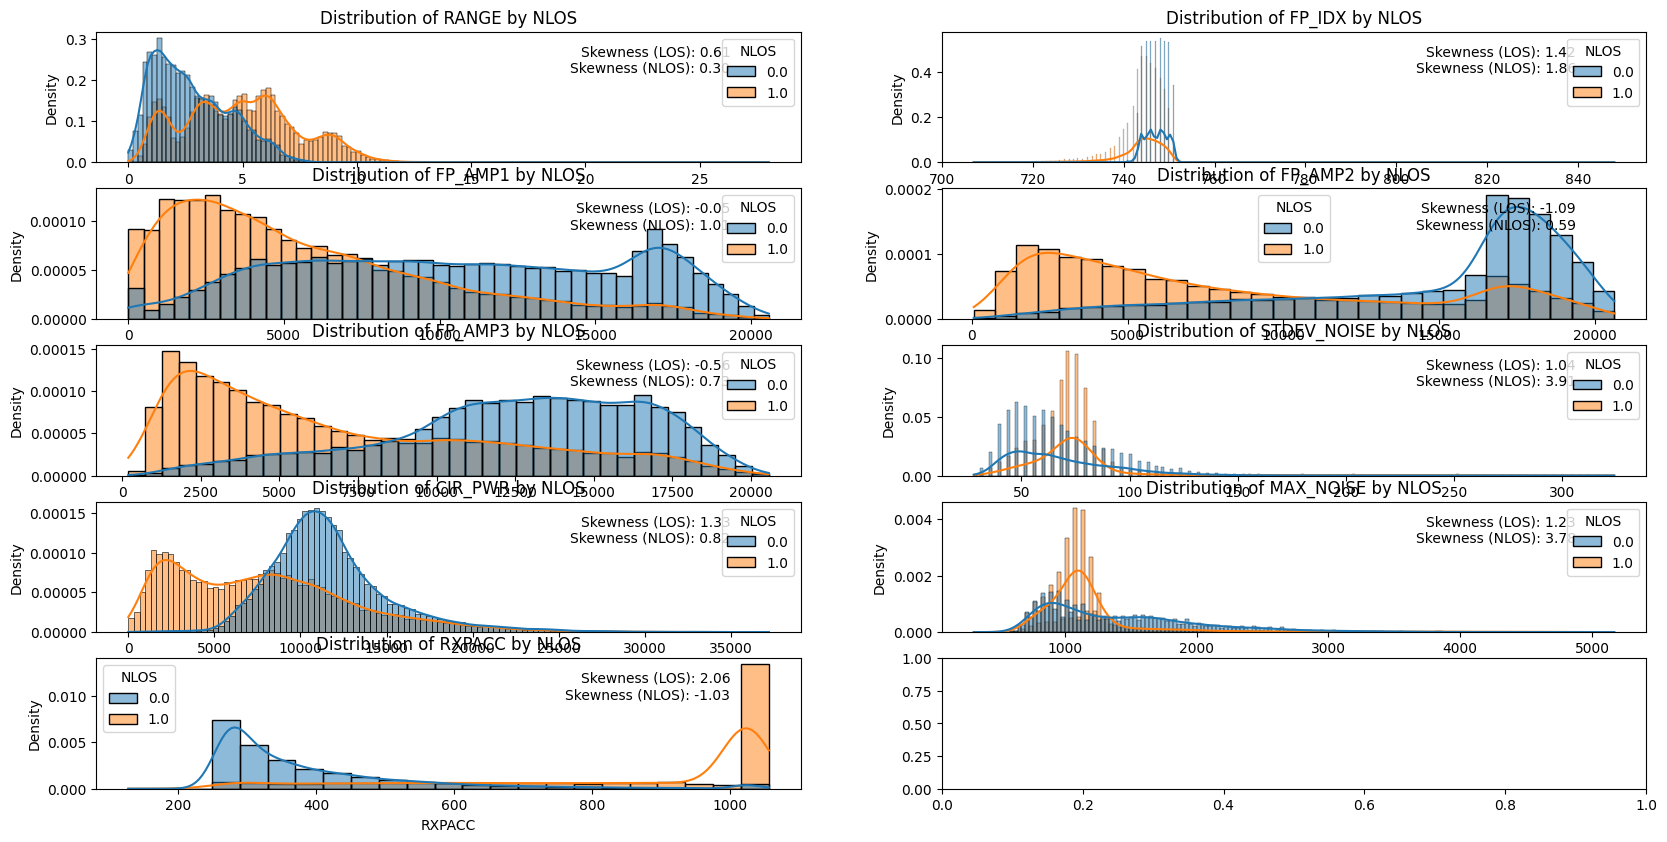

In [36]:
# Get non-class features
features = [i for i in df_noncir.columns if i != 'NLOS']

# Plot histograms
print("Histograms for unscaled non-CIR dataset")
plot_histogram(df_noncir, features)

#### Non-CIR Dataset (Min-Max scaled) histograms

In [ ]:
# Get non-class features
features = [i for i in df_noncir_mm_scaled.columns if i != 'NLOS']

# Plot histograms
print("Histograms for Min-Max scaled non-CIR dataset")
plot_histogram(df_noncir_mm_scaled, features)

#### Non-CIR Dataset (Standard scaled) histograms

In [ ]:
# Get non-class features
features = [i for i in df_noncir_standard_scaled.columns if i != 'NLOS']

# Plot histograms
print("Histograms for Standard scaled non-CIR dataset")
plot_histogram(df_noncir_standard_scaled, features)

In [ ]:
""" Examine relationship between features for LOS/NLOS """
import itertools

# Filters for each class
nlos_class = (df_noncir['NLOS'] == 1)
los_class = (df_noncir['NLOS'] == 0)

# Create dictionary of feature pair combinations, excluding NLOS
dict_combinations = {}
for combination in itertools.combinations(df_noncir.columns, 2):
    column1, column2 = combination
    if column1 not in dict_combinations:
        dict_combinations[column1] = []
    dict_combinations[column1].append((column1, column2))
del dict_combinations['NLOS']

# Plot each group of combinations separately
for column, combinations in dict_combinations.items():
    fig, axes = plt.subplots(1, len(combinations), figsize=(20, 4))  # Adjust figsize as needed
    fig.suptitle(f"Plots for {column}", fontsize=16)
    if len(combinations) == 1:
        axes = [axes]  # Ensure axes is a list to handle single subplot case
    for i, combination in enumerate(combinations):
        ax = axes[i]  # Access the axes
        ax.scatter(df_noncir[nlos_class][combination[0]], df_noncir[nlos_class][combination[1]], c="yellow", s=20, edgecolor='k')
        ax.scatter(df_noncir[los_class][combination[0]], df_noncir[los_class][combination[1]], c="blue", s=20, edgecolor='k')
        ax.set_xlabel(combination[0])
        ax.set_ylabel(combination[1])
        ax.set_title(f"{combination[0]} vs {combination[1]}")
    plt.tight_layout()
    plt.show()

#### Interpretation
- Find Feature v Feature that result in visible clusters

    For example, for STDEV_NOISE vs FP_POWER:
    Low  levels of  noise compared  to first  path amplitude have little impact on the timestamp  accuracy.  In  case  of  high noise values and NLOS  signal  path, first  path  can  be buried in the noise, which results in incorrect timestamp detection. With a higher absolute CIRE noise figure it is more likely that the quality of receive timestamp will be
poorer. High noise may mean that the real first path is irretrievably buried in the noise

    FP_AMP1, FP_AMP2 and FP_AMP3 are derived from FP_IDX (FP_INDEX). They are all 16-bit values that are part of reporting the magnitude of the leading edge signal seen in the accumulator data memory during the LDE algorithm’s analysis:
    - FP_AMP1: The amplitude of the sample reported in the FP_AMPL1 parameter is the magnitude of the accumulator tap at the index 1 beyond the integer portion of the rising edge FP_INDEX
    - FP_AMP2: The amplitude of the sample reported in the FP_AMPL2 parameter is the magnitude of the accumulator tap at the index 2 beyond the integer portion of the rising edge FP_INDEX.
    - FP_AMP3:  The amplitude of the sample reported in the FP_AMPL3 parameter is the magnitude of the accumulator tap at the index 3 beyond the integer portion of the rising edge FP_INDEX

- Features to be kept:
    - STDEV_NOISE
    - FP_IDX
    - FP_POWER
    - RX_POWER
    - D_POWER
    - D_POWER_LOS
    - D_POWER_NLOS
    - NLOS (Class)

- ????
    - RANGE
    - MAX_NOISE
    - FRAME_LEN
    - PREAM_LEN

In [ ]:

# Add some metrics to compute threshold to determine variability of skewness for classification
pass

""" 
Kurtosis: Kurtosis measures the "tailedness" of the distribution. A high positive kurtosis indicates heavy tails (peakedness), while a negative kurtosis indicates light tails (flatness). You can use kurtosis as a metric to assess the peakedness of the distribution for each class and compare them. A significant difference in kurtosis between classes might indicate distinct separation.

Effect size measures: Effect size measures such as Cohen's d or Cliff's delta can quantify the magnitude of the difference between the two distributions. You can use these measures to compare the effect size of the difference between LOS and NLOS distributions for a feature. A large effect size suggests a substantial difference between the classes.

Overlap area: You can visually inspect the histograms of the two classes and calculate the overlap area between the distributions. A smaller overlap area indicates less ambiguity in classification based on that feature. You can use techniques like the Bhattacharyya coefficient or the area under the Receiver Operating Characteristic (ROC) curve to quantify the overlap.

Statistical tests: Conducting statistical tests such as the Kolmogorov-Smirnov test, Anderson-Darling test, or Mann-Whitney U test can help assess whether the distributions significantly differ between the two classes. You can use the p-value from these tests to determine if the distributions are distinct.

Domain knowledge: Consider the domain-specific knowledge and context of your problem. A threshold that makes sense in one context may not be appropriate in another. Consulting with domain experts can provide valuable insights into what constitutes a meaningful separation for your specific application.
"""

Correlation Matrix against features excluding the individual CIR data, drop those above 0.7 or under -0.7

In [ ]:
corr_df = df_noncir.drop(columns='NLOS')
correlation_matrix = corr_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Find pairs of features with high correlation coefficients
threshold = 0.8  # Set a threshold for high correlation
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("Pairs of features with high correlation coefficients:")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")
else:
    print("No pairs of features with high correlation coefficients found.")

Decision Tree to identify which feature is important

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df_noncir.drop(columns='NLOS')
y = df_noncir['NLOS']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame based on feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
feature_importance_df

As seen from the df also, the CH, bitrate, PRFR, FRAME_LEN, PREAM_LEN are close to a common constant and thus also no feature importance of it. FP_IDX prove to be of low imporatance too.

#### We can now either drop all those unimportant or do feature engineering

In [ ]:
df_original['FRAME_LEN'].value_counts()

In [ ]:
df_original['PREAM_LEN'].value_counts()

In [ ]:
# Drop
df_noncir_trimmed = df_noncir.drop(['FRAME_LEN', 'PREAM_LEN'], axis=1)
df_noncir_trimmed

##### Drop all that is used for transformation. And drop all those that has low importance.

In [ ]:
no_df_cir_transform = no_df_cir_rxsignal_cleaned.drop(['FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'RXPACC', 'CIR_PWR', 'CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR'], axis=1)

no_df_cir_transform

#### Results Analysis

With PCA, we aim to visualise all the CIR data, summarised into this 25 PC components. This reduce the variance of data caused by aggregation.

Observe the data variation of the aggragated data against NLOS

CIR PEAK VALUE AND EARLY ENERGY

In [ ]:
aggregated_df_cir = pd.concat([df_original.iloc[:, :1], df_cir_stats], axis=1).copy()
aggregated_df_cir

In [ ]:
# Get non-class features
features = [i for i in aggregated_df_cir.columns if i != 'NLOS']

# Plot histograms
print("Histograms for aggregated CIR dataset")
plot_histogram(aggregated_df_cir, features)

In [ ]:
# Get non-class features
features = [i for i in aggregated_df_cir.columns if i != 'NLOS']

# Plot boxplots
print("Boxplots for aggregated CIR dataset")
plot_box_plot(aggregated_df_cir, features)

#### For all CIR data we have made into two type of dataset.

df_cir_stats = CIR data combined into Mean, Variance, Skewness....



df_cir_pca = PCA of all the CIR data

### Lets combine all the data for training

1) First 15 re-engineered to get First Path Power level and Receive Signal Level. Second half re-engineered to the mean, variance

In [ ]:
from sklearn.preprocessing import StandardScaler

dataset_1 = pd.concat([no_df_cir_transform, df_cir_stats], axis=1)
temp_df = dataset_1.copy()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(temp_df)

df_scaled = pd.DataFrame(scaled_features, columns=temp_df.columns)

df_scaled['NLOS'] = temp_df['NLOS'].values

# Export data
save_to_pickle("dataset_1", temp_df)

df_scaled.head()

2) First 15 re-engineered to get First Path Power level and Recieve Signal Level. Second half is the PCA of the CIR Data

In [ ]:
dataset_2 = pd.concat([no_df_cir_transform, df_cir_pca], axis=1)
save_to_pickle("dataset_2", dataset_2)
dataset_2

3) First 15, drop all unimportant features. Second half re-engineered to the mean, variance

In [ ]:
dataset_3 = pd.concat([df_noncir_trimmed, df_cir_stats], axis=1)
temp_df = dataset_3.copy()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(temp_df)

df_scaled = pd.DataFrame(scaled_features, columns=temp_df.columns)

df_scaled['NLOS'] = temp_df['NLOS'].values

df_scaled.head()
save_to_pickle("dataset_3", temp_df)
dataset_3

 3) First 15, drop all unimportant features. Second half is the PCA of the CIR Data

In [ ]:
dataset_4 = pd.concat([df_non_cir_trimmed, df_cir_pca], axis=1)
save_to_pickle("dataset_4", dataset_4)
dataset_4

### Dataset Subsetting
- Non-CIR Dataset (Dataset without 1000+ CIR columns)
    - Features used to obtain derived features `FP_POWER`, `RX_POWER` and `D_POWER` are removed

- Non-CIR-Trimmed Dataset (Dataset without 1000+ CIR columns, and with unimportant features removed)
    - Features used to obtain derived features `FP_POWER`, `RX_POWER` and `D_POWER` are removed
    - Unimportant features are removed

- CIR Dataset (Dataset that only consists of 1000+ CIR columns)
    - CIR features are re-engineered into their descriptive statistical values (mean, variance etc)

- Data-Subset Variants:
    - `df_noncir`: Non-CIR
    - `df_trim`: Non-CIR-Trimmed
    - `df_cir`: CIR
    - `df_pca`: PCA(CIR)
    
- Dataset Variants
    - `df_noncir_cir`: Non-CIR + CIR
    - `df_noncir_pca`: Non-CIR + PCA(CIR)
    - `df_trim_cir`: Non-CIR-Trimmed + CIR
    - `df_trim_pca`: Non-CIR-Trimmed + PCA(CIR)

First 15 feature we have made into two type of dataset.

df_noncir_trimmed = Only unimportant is removed.


no_df_cir_transform = feature transformation and unimportant is removed

### Data Subset: Non-CIR Dataset

In [ ]:
# Build non-CIR dataset (first 15 features of original dataset, and last 5 derived features of the dataset's copy)
df_noncir = pd.concat([df_original.iloc[:, :15], df_original_copy.iloc[:, -5:]], axis=1)

# Remove attributes used to compute derived features, and single-valued attributes (CH, BITRATE, PRFR)
df_noncir.drop(columns=['FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'RXPACC', 'CIR_PWR', 'CH', 'BITRATE', 'PRFR'], inplace=True)
df_noncir

# References
[1] K. Bregar, A. Hrovat, and M. Mohorcic, “UWB LOS and NLOS Data Set,” GitHub, https://github.com/ewine-project/UWB-LOS-NLOS-Data-Set (accessed Mar. 30, 2024). <br>
[2] K. Bregar, A. Hrovat, and M. Mohorcic, “NLOS Channel Detection with Multilayer Perceptron in Low-Rate Personal Area Networks for Indoor Localization Accuracy Improvement,” Jožef Stefan International Postgraduate School Student Conference, May 2016. [Online]. Available: https://www.researchgate.net/publication/308986067_NLOS_Channel_Detection_with_Multilayer_Perceptron_in_Low-Rate_Personal_Area_Networks_for_Indoor_Localization_Accuracy_Improvement <br>
[3] D. Decawave, “DW1000 User Manual,” decaWave DW1000 User Manual, https://thetoolchain.com/mirror/dw1000/dw1000_user_manual_v2.05.pdf (accessed Mar. 30, 2024). 